In [1]:
import os.path
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from gensim.downloader import load
import gensim
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist #used to determine number of tokens
from gensim.models import Word2Vec

In [2]:
with open("goemotions.json", "r") as read_content:
    file = pd.read_json(read_content)

Taking count of all sentiment and emotion tags respectively associated with Reddit posts. Then creating a dictionary to create key-value pairings.

In [3]:
print(file.loc[file[0]=='They have THE BEST tortillas too. Made right in front of you. Mmmmmm!'])

                                                        0           1  \
264     They have THE BEST tortillas too. Made right i...     neutral   
23540   They have THE BEST tortillas too. Made right i...     neutral   
73369   They have THE BEST tortillas too. Made right i...  admiration   
86008   They have THE BEST tortillas too. Made right i...  admiration   
115605  They have THE BEST tortillas too. Made right i...    approval   

               2  
264      neutral  
23540    neutral  
73369   positive  
86008   positive  
115605  positive  


In [4]:
sentiment = file[2].value_counts().to_dict()
sentiment_values = sentiment.keys()
sentiment_frequency = sentiment.values()

In [5]:
emotion = file[1].value_counts().to_dict()
emotion_values = emotion.keys()
emotion_frequency = emotion.values()

In [6]:
# print(emotion)
# emotion_list = list(emotion_frequency)
# pdP = pd.Series(emotion_list)
# print(pdP.describe())

In [7]:
# print(sentiment)
# sentiment_list = list(sentiment_frequency)
# pdP = pd.Series(sentiment_list) 
# print(pdP.describe())

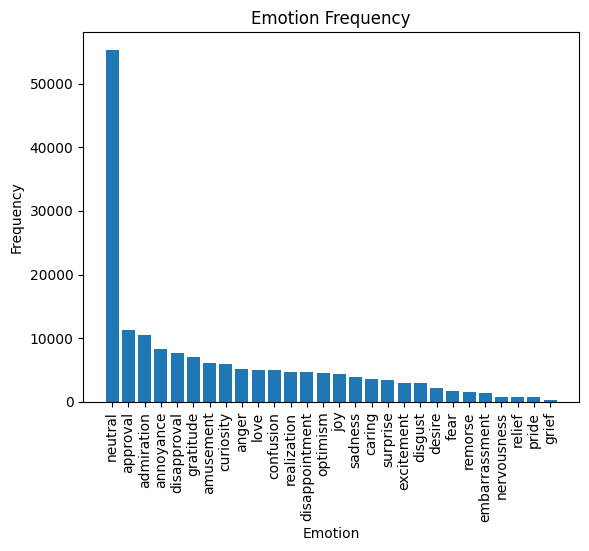

In [8]:
plt.xlabel("Emotion")
plt.ylabel("Frequency")
plt.title("Emotion Frequency")
plt.xticks(rotation= 90) #done for readbility purposes
plt.bar(emotion_values, emotion_frequency)
plt.savefig("bar_emotion.png")
plt.show()

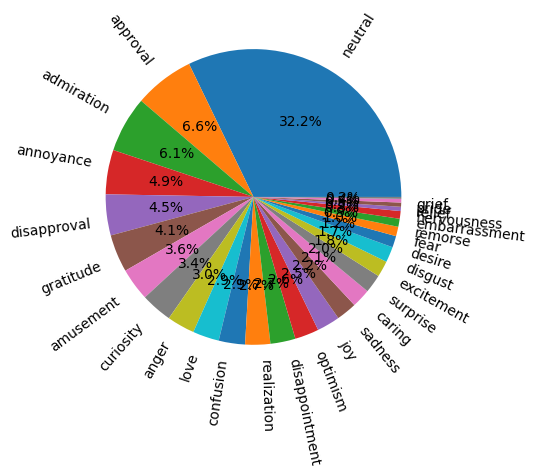

In [9]:
emotionLabels = []
sizes = []
for x, y in emotion.items():
    emotionLabels.append(x)
    sizes.append(y)
plt.pie(sizes, labels=emotionLabels, rotatelabels = True, autopct ='%1.1f%%')
plt.savefig("pie_emotion.png")
plt.show()


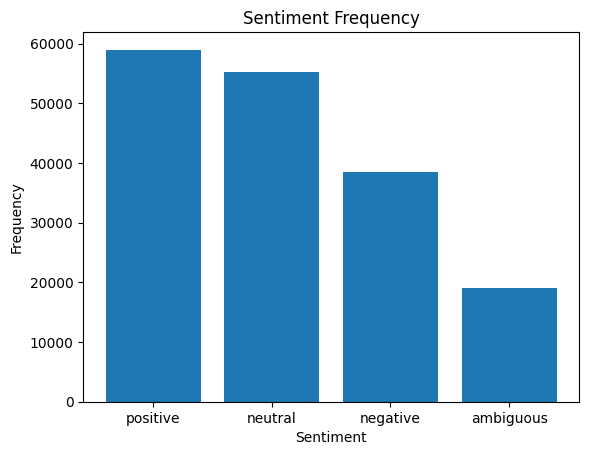

In [10]:
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Sentiment Frequency")
plt.bar(sentiment_values, sentiment_frequency)
plt.savefig("bar_sentiment.png")
plt.show()

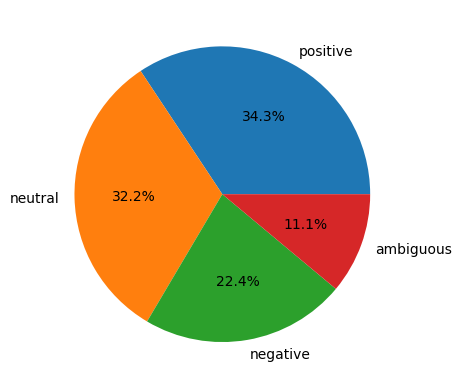

In [11]:
sentimentLabels = []
sizes = []
for x, y in sentiment.items():
    sentimentLabels.append(x)
    sizes.append(y)
plt.pie(sizes, labels=sentimentLabels, autopct ='%1.1f%%')
plt.savefig("pie_sentiment.png")
plt.show()


Plotting of Frequency vs. Emotion and Frequency vs. Sentiment <br>
Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

<h1>extract tokens/words</h1>

In [12]:
post = file[0].tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(post)
# vectorizer.get_feature_names_out()

In [13]:
#print(f"The number of unique words is {len(X.toarray()[0])} unique words")

Given that when X.toarray() is used, the occurrences of words in a post is counted for example <br> "This document is the second document."<br> the word document is used twice [0 2 0 1 0 1 1 0 1] mapping to the array of unique words ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
<br>
Sources: <br>
https://stackoverflow.com/questions/27488446/how-do-i-get-word-frequency-in-a-corpus-using-scikit-learn-countvectorizer
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [14]:
post = file[0]
vectorizer = CountVectorizer()
#vectorize posts into words that were used
# file[0] = vectorizer.fit_transform(post)
X = vectorizer.fit_transform(file[0])
# X_features =vectorizer.get_feature_names_out()

leEmo = preprocessing.LabelEncoder()
leSent = preprocessing.LabelEncoder()
#list(le.inverse_transform([2, 2, 1]))
encodedEmo = leEmo.fit_transform(file[1]) #change 0 to the column of emotions with no separation
#vectorize sentiments
encodedSentiment = leSent.fit_transform(file[2]) #change 0 to the column of sentiment with no separation

<h2>2.2 Training and Test data split</h2>

In [15]:
#Question 2.2
X_train,X_test,yemo_train, yemo_test,ysent_train, ysent_test = train_test_split(X,encodedEmo,encodedSentiment, test_size = 0.2, train_size=0.8)

In [16]:
print(len(yemo_train))

137456


In [17]:
def metrics(true_y,prediction_y):
    print(f"Accuracy: {accuracy_score(y_true=true_y,y_pred= prediction_y)}")
    print(f"Precision (Weighted): {precision_score(y_true=true_y,y_pred= prediction_y, average='weighted')}")
    print(f"F1 Score (Weighted): {f1_score(y_true=true_y,y_pred= prediction_y,average='weighted')}")
    print(f"F1 Score (Macro): {f1_score(y_true=true_y,y_pred= prediction_y,average='macro')}")
    print(classification_report(y_true=true_y,y_pred= prediction_y, zero_division='warn'))
    confusion_matrix(y_true=true_y,y_pred= prediction_y)

<h2>Multinomial Naive Bayes Classifier (naive bayes.MultinomialNB.html)
with the default parameters.</h2>

Source: https://www.delftstack.com/howto/python/how-to-get-dictionary-keys-as-a-list-in-python/

In [18]:
classifier = MultinomialNB()
if (os.path.exists('models/MNB1_model.pickle')):
    pickle_in = open('models/MNB1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/MNB1_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/MNB2_model.pickle')):
    pickle_in = open('models/MNB2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train,ysent_train)
    with open('models/MNB2_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


Score for Emotion: 0.4344081015015714
Accuracy: 0.4344081015015714
Precision (Weighted): 0.47948138608484675
F1 Score (Weighted): 0.36668932937335313
F1 Score (Macro): 0.22094239175120542
              precision    recall  f1-score   support

           0       0.56      0.52      0.54      2100
           1       0.61      0.36      0.45      1205
           2       0.49      0.18      0.26      1012
           3       0.40      0.14      0.21      1657
           4       0.45      0.17      0.25      2280
           5       0.52      0.10      0.17       736
           6       0.52      0.09      0.16       973
           7       0.56      0.17      0.27      1179
           8       0.52      0.04      0.07       454
           9       0.41      0.07      0.11       898
          10       0.46      0.15      0.23      1528
          11       0.63      0.12      0.20       594
          12       0.75      0.02      0.04       296
          13       0.55      0.07      0.12       583
 

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

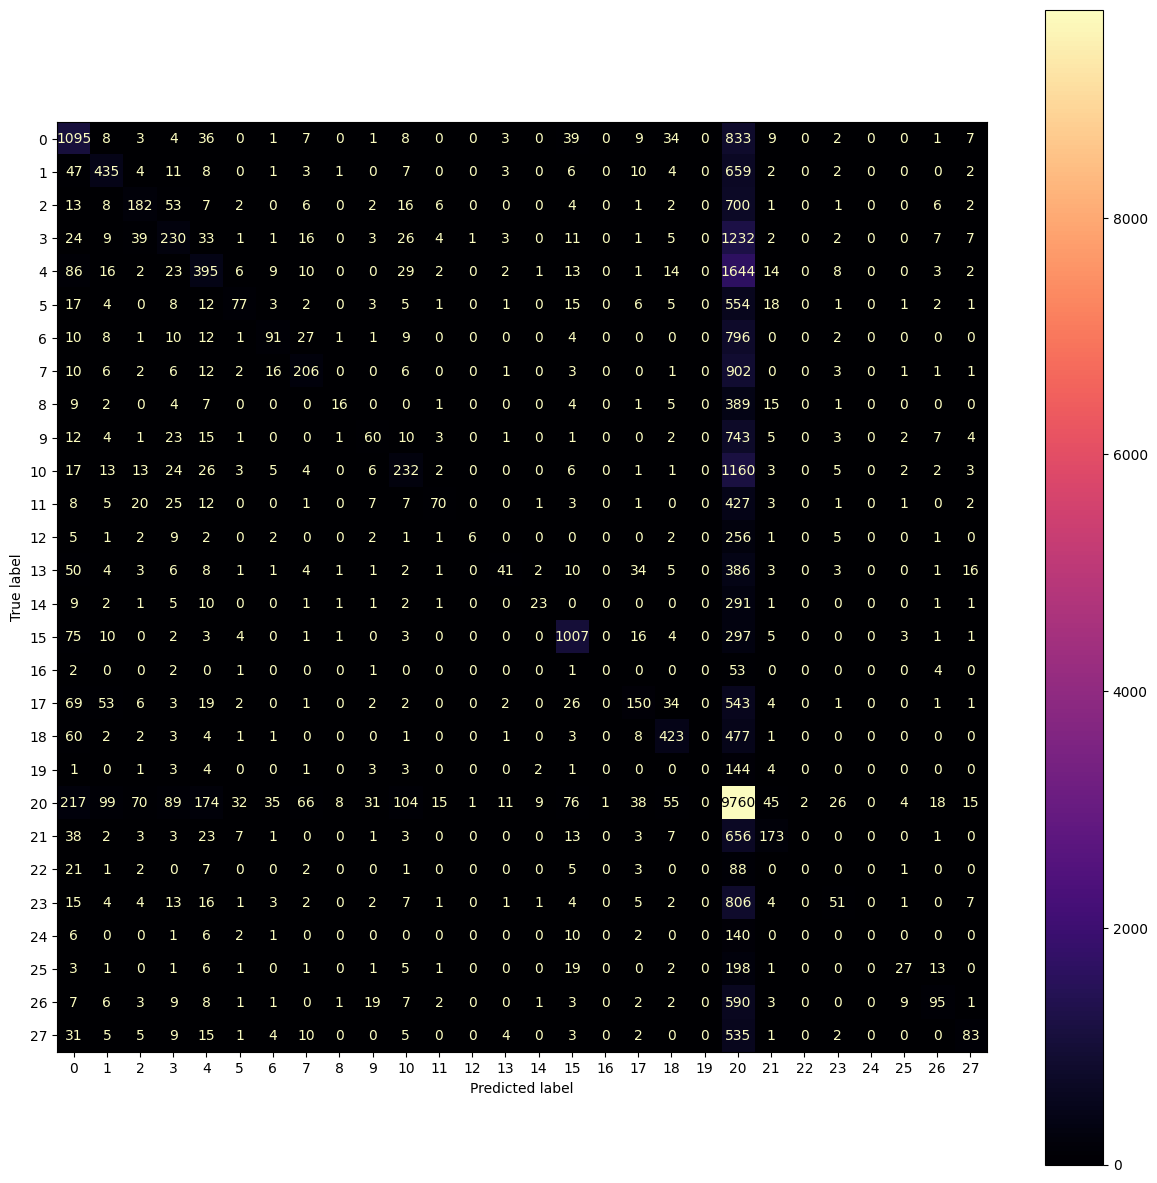

In [19]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test,yemo_test)}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

Score for Sentiment: 0.6075835176347341
Accuracy: 0.6075835176347341
Precision (Weighted): 0.6030298076700293
F1 Score (Weighted): 0.6010995432152331
F1 Score (Macro): 0.5670022073390752
              precision    recall  f1-score   support

           0       0.55      0.32      0.41      3817
           1       0.60      0.60      0.60      7616
           2       0.56      0.57      0.56     11001
           3       0.66      0.74      0.70     11930

    accuracy                           0.61     34364
   macro avg       0.59      0.56      0.57     34364
weighted avg       0.60      0.61      0.60     34364



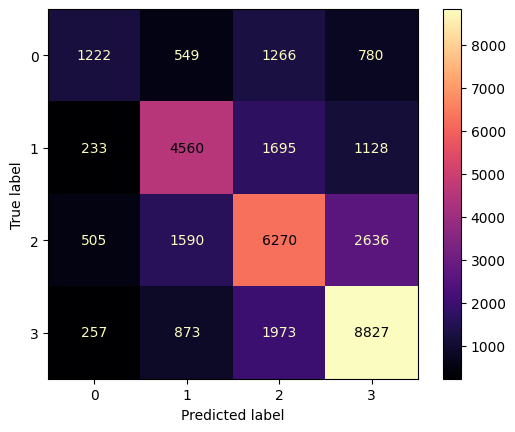

In [20]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test,ysent_test)}")
metrics(ysent_test,y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>cross validation</h2>
<body>from sklearn.model_selection import cross_val_score</body>

<h2>Decision Tree (tree.DecisionTreeClassifier) with the default parameters.</h2>

In [21]:
classifier = DecisionTreeClassifier()
if (os.path.exists('models/DT1_model.pickle')):
    pickle_in = open('models/DT1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/DT1_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/DT1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)


if (os.path.exists('models/DT2_model.pickle')):

    pickle_in = open('models/DT2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train,ysent_train)
    with open('models/DT2_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/DT2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


Score for Emotion: 0.5926260039576301
Accuracy: 0.5926260039576301
Precision (Weighted): 0.6096799838646274
F1 Score (Weighted): 0.5896721222007
F1 Score (Macro): 0.5145326855613117
              precision    recall  f1-score   support

           0       0.58      0.81      0.68      2100
           1       0.57      0.80      0.66      1205
           2       0.43      0.69      0.53      1012
           3       0.40      0.57      0.47      1657
           4       0.46      0.57      0.51      2280
           5       0.46      0.53      0.49       736
           6       0.47      0.57      0.51       973
           7       0.58      0.62      0.60      1179
           8       0.52      0.55      0.53       454
           9       0.41      0.42      0.41       898
          10       0.54      0.50      0.52      1528
          11       0.59      0.44      0.50       594
          12       0.55      0.43      0.48       296
          13       0.53      0.43      0.48       583
       

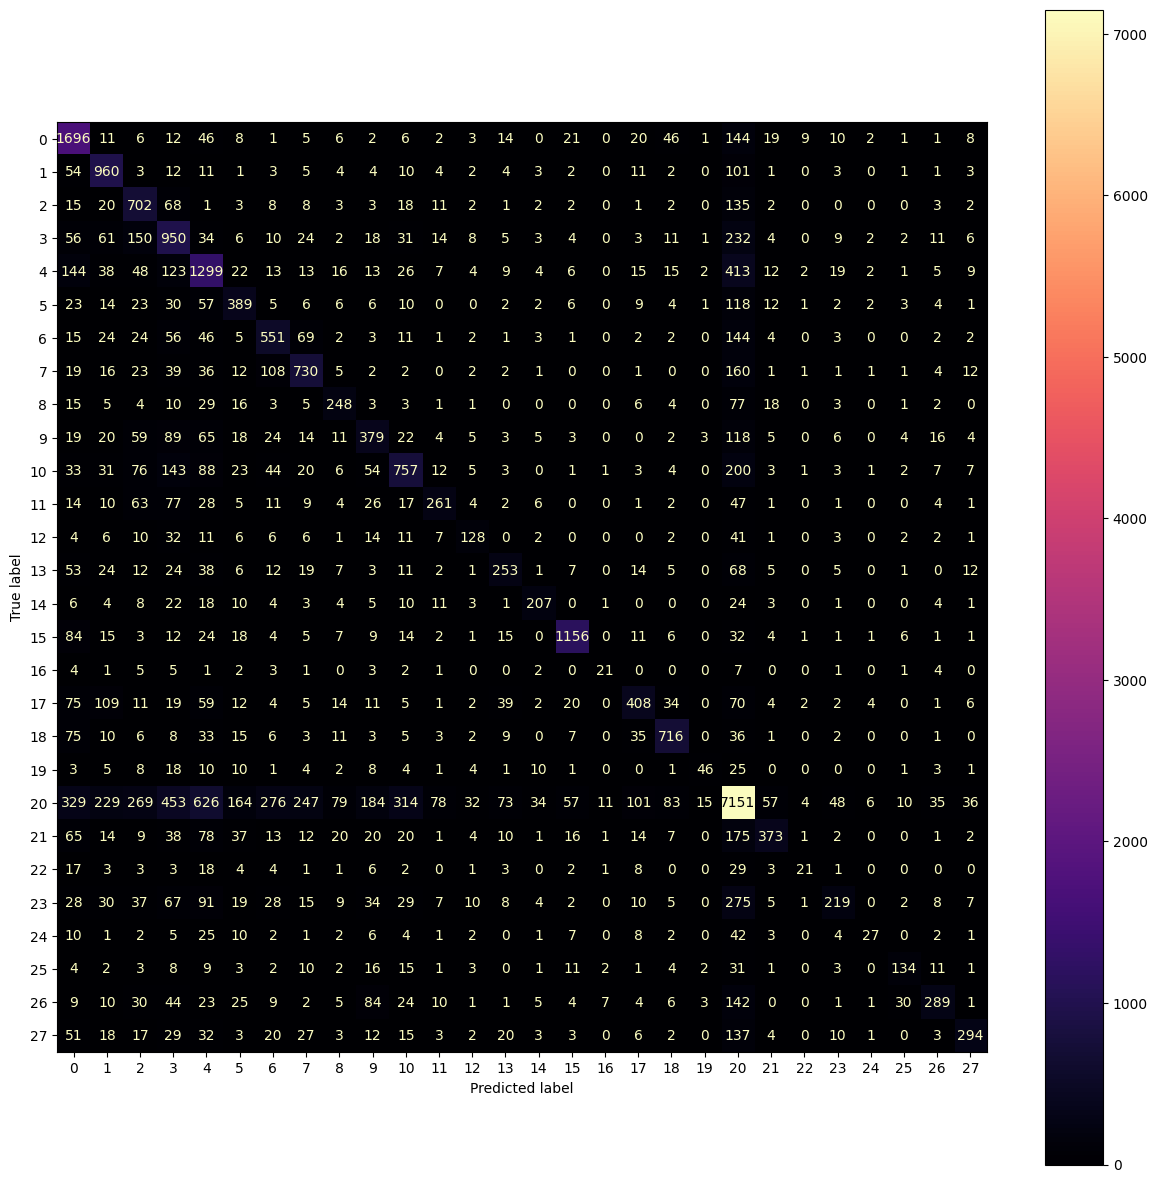

In [22]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test,yemo_test)}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')


Score for Sentiment: 0.7167093469910372
Accuracy: 0.7167093469910372
Precision (Weighted): 0.7290728375272929
F1 Score (Weighted): 0.7191818741709083
F1 Score (Macro): 0.7039081353148868
              precision    recall  f1-score   support

           0       0.57      0.72      0.63      3817
           1       0.67      0.78      0.72      7616
           2       0.71      0.67      0.69     11001
           3       0.84      0.72      0.78     11930

    accuracy                           0.72     34364
   macro avg       0.70      0.72      0.70     34364
weighted avg       0.73      0.72      0.72     34364



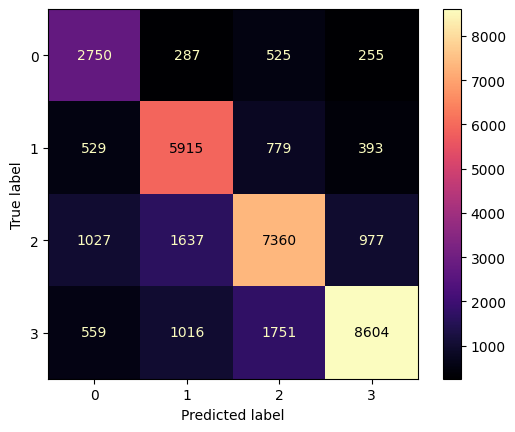

In [23]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test,ysent_test)}")
metrics(ysent_test,y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multi-Layered Perceptron (neural network.MLPClassifier) with the default parameters.</h2>

In [24]:
classifier = MLPClassifier()
if (os.path.exists('models/MLP1_model.pickle')):
    pickle_in = open('models/MLP1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    MLP1 = classifier.fit(X_train, yemo_train)
    with open('models/MLP1_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/MLP1_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/MLP2_model.pickle')):
    pickle_in = open('models/MLP2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    MLP2 = classifier.fit(X_train,ysent_train)
    with open('models/MLP2_model.pickle','wb') as f:
            pickle.dump(classifier, f)
    pickle_in = open('models/MLP2_model.pickle','rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


In [25]:
print(np.shape(X_train))
print(np.shape(yemo_train))

(137456, 30449)
(137456,)


Score for Emotion: 0.5768245838668374
Accuracy: 0.5768245838668374
Precision (Weighted): 0.5701597747187582
F1 Score (Weighted): 0.5709713159419666
F1 Score (Macro): 0.5038427079291158
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      2100
           1       0.64      0.67      0.65      1205
           2       0.50      0.51      0.51      1012
           3       0.44      0.38      0.41      1657
           4       0.49      0.40      0.44      2280
           5       0.50      0.46      0.48       736
           6       0.49      0.45      0.47       973
           7       0.60      0.49      0.54      1179
           8       0.45      0.52      0.48       454
           9       0.41      0.36      0.39       898
          10       0.47      0.46      0.46      1528
          11       0.54      0.48      0.50       594
          12       0.45      0.44      0.44       296
          13       0.45      0.39      0.42       583
    

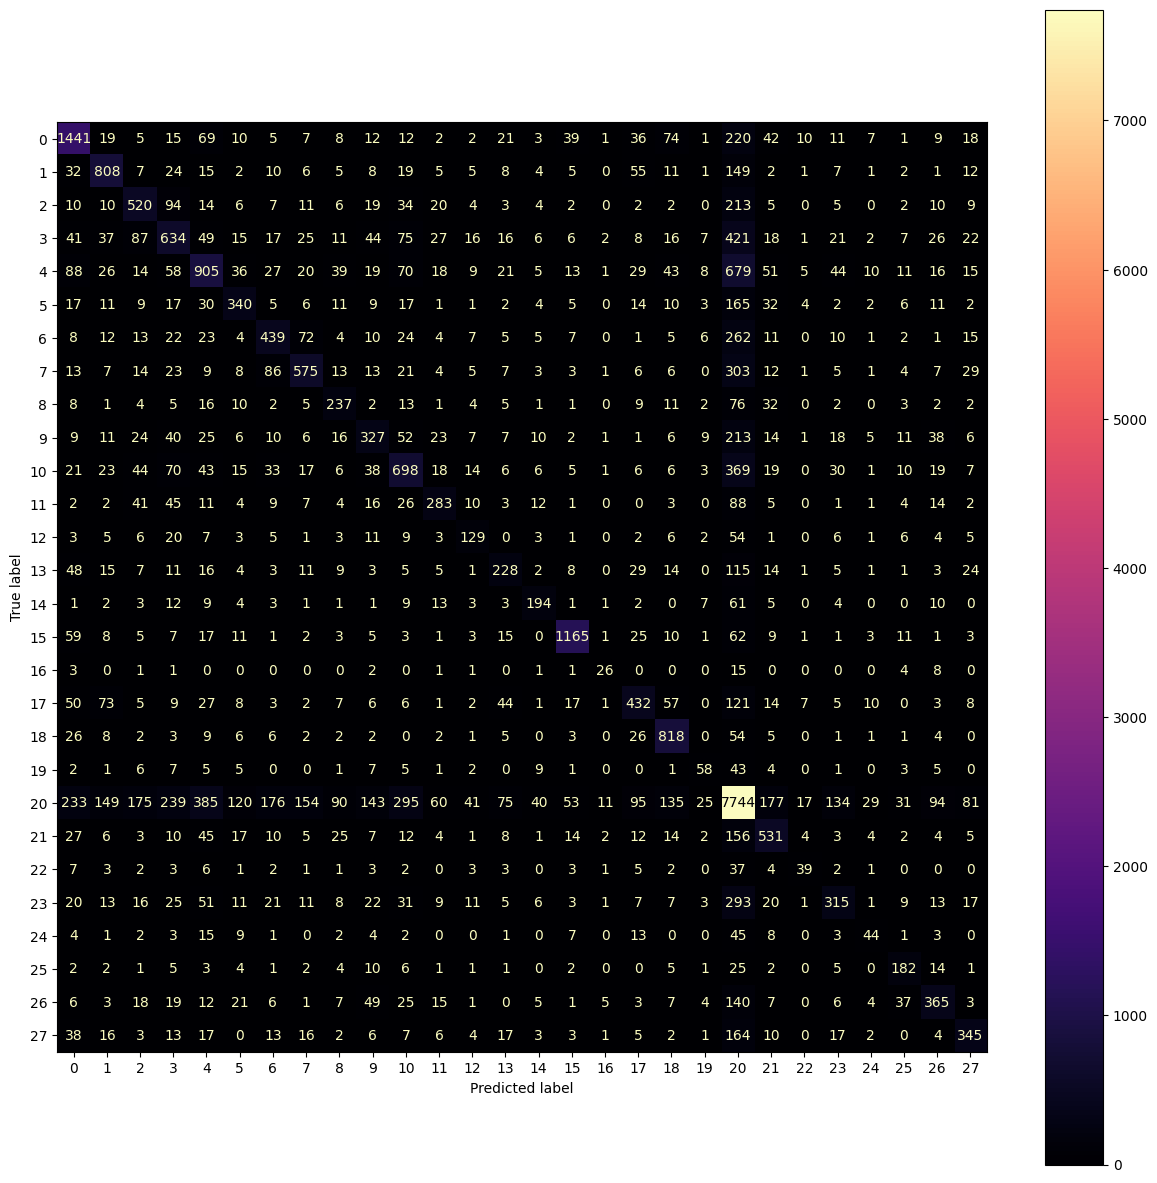

In [26]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test,yemo_test)}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

Score for Sentiment: 0.5567163310441159
Accuracy: 0.5567163310441159
Precision (Weighted): 0.5624654385990291
F1 Score (Weighted): 0.5404165821160639
F1 Score (Macro): 0.47791224837575563
              precision    recall  f1-score   support

           0       0.51      0.12      0.19      3817
           1       0.56      0.46      0.50      7616
           2       0.47      0.64      0.54     11001
           3       0.67      0.68      0.67     11930

    accuracy                           0.56     34364
   macro avg       0.55      0.47      0.48     34364
weighted avg       0.56      0.56      0.54     34364



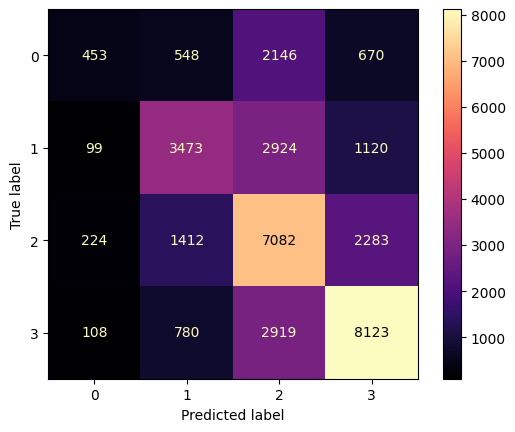

In [27]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test,ysent_test)}")
metrics(ysent_test,y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multinomial Naive Bayes Classifier found using GridSearchCV</h2>

input parameter requires a model object

using the following alpha parameters 0.5,0,0.36,1


In [28]:
parameters = {"alpha":(0.5,0,0.36,1)}
clfMNB = MultinomialNB()

classifier = GridSearchCV(estimator=clfMNB, param_grid=parameters,n_jobs=-1)

if (os.path.exists('models/MNB1GridCV_model.pickle')):
    pickle_in = open('models/MNB1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/MNB1GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/MNB2GridCV_model.pickle')):
    pickle_in = open('models/MNB2GridCV_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train,ysent_train)
    with open('models/MNB2GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/MNB2GridCV_model.pickle','rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


<h2>Decision Tree Classifier found using GridSearchCV</h2>

input parameter requires a model object

using the various value for the following parameters: criterion, max_depth, min_samples


In [29]:
parameters = {"criterion":("gini","entropy"),"max_depth":(100,3),"min_samples_split":(12,5,30)}
clfDT = DecisionTreeClassifier()

classifier = GridSearchCV(estimator=clfDT, param_grid=parameters,n_jobs=-1)

if (os.path.exists('models/DT1GridCV_model.pickle')):
    pickle_in = open('models/DT1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/DT1GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/DT1GridCV_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/DT2GridCV_model.pickle')):
    pickle_in = open('models/DT2GridCV_model.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train,ysent_train)
    with open('models/DT2GridCV_model.pickle','wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/DT2GridCV_model.pickle','rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


Best estimator (Emotion): DecisionTreeClassifier(max_depth=100, min_samples_split=30), Best Score: 0.4044639513068846
Accuracy: 0.5051798393667792
Precision (Weighted): 0.5093404780582947
F1 Score (Weighted): 0.4637204816855863
F1 Score (Macro): 0.36248345983058067
              precision    recall  f1-score   support

           0       0.59      0.57      0.58      2100
           1       0.59      0.65      0.62      1205
           2       0.48      0.35      0.41      1012
           3       0.36      0.20      0.26      1657
           4       0.42      0.19      0.26      2280
           5       0.48      0.22      0.30       736
           6       0.47      0.25      0.33       973
           7       0.55      0.27      0.36      1179
           8       0.54      0.30      0.38       454
           9       0.39      0.15      0.21       898
          10       0.45      0.21      0.29      1528
          11       0.53      0.25      0.33       594
          12       0.48      0.

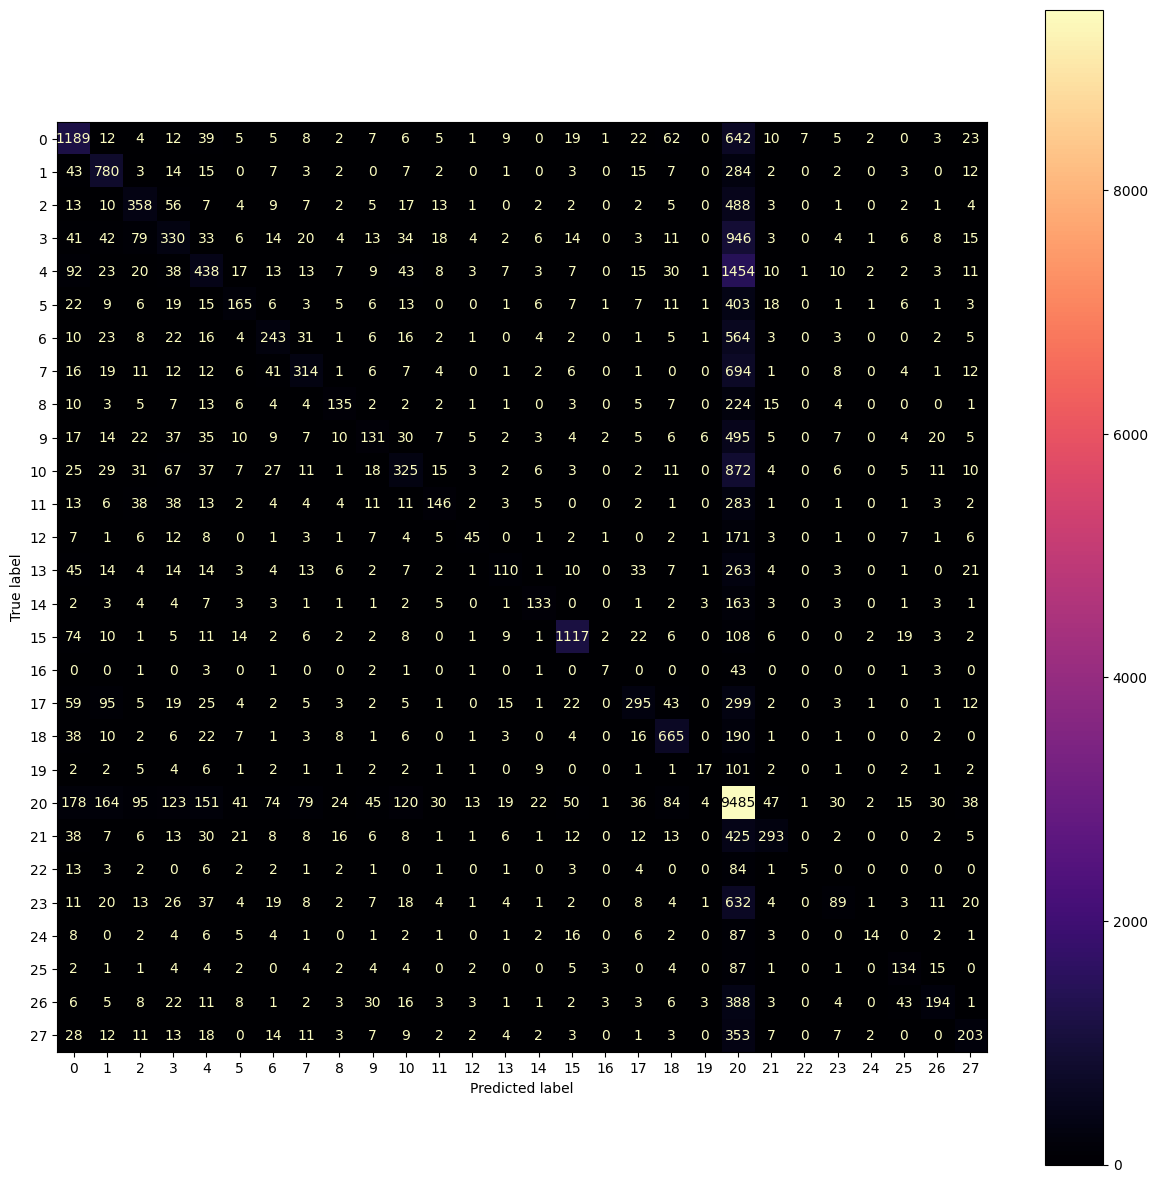

In [30]:
y_emo_predict = clf1.best_estimator_.predict(X_test)

print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
metrics(yemo_test,y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax,cmap='magma')

Best estimator (Sentiment): DecisionTreeClassifier(max_depth=100, min_samples_split=5), Best Score: 0.515219404662324
Accuracy: 0.618437900128041
Precision (Weighted): 0.6654836958691633
F1 Score (Weighted): 0.6207119001732091
F1 Score (Macro): 0.5936530557957277
              precision    recall  f1-score   support

           0       0.53      0.44      0.48      3817
           1       0.68      0.51      0.58      7616
           2       0.50      0.79      0.61     11001
           3       0.85      0.59      0.70     11930

    accuracy                           0.62     34364
   macro avg       0.64      0.58      0.59     34364
weighted avg       0.67      0.62      0.62     34364



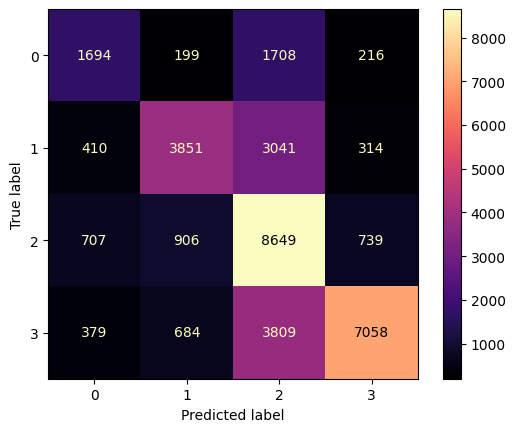

In [31]:
y_sent_predict = clf2.best_estimator_.predict(X_test)

print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
metrics(ysent_test,y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multi-Layered Perceptron found using GridSearchCV</h2>

input parameter requires a model object

using the various value for the following parameters: activation, architectures, solvers
Hidden layers <a href="https://datascience.stackexchange.com/questions/19768/how-to-implement-pythons-mlpclassifier-with-gridsearchcv">Link</a>

<b>Unable to converge</b>


In [32]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True, verbose=True,max_iter=5)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters,n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/MLP1GridCV_model.pickle')):
        pickle_in = open('models/MLP1GridCV_model.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_train, yemo_train)
        with open('models/MLP1GridCV_model.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/MLP1GridCV_model.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/MLP2GridCV_model.pickle')):
        pickle_in = open('models/MLP2GridCV_model.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_train,ysent_train)
        with open('models/MLP2GridCV_model.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/MLP2GridCV_model.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 wh

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

Accuracy: 0.45751367710394597
Precision (Weighted): 0.4362826523837602
F1 Score (Weighted): 0.3781522789152663
F1 Score (Macro): 0.24178024676820647
              precision    recall  f1-score   support

           0       0.51      0.55      0.53      2100
           1       0.54      0.66      0.59      1205
           2       0.41      0.26      0.32      1012
           3       0.20      0.05      0.08      1657
           4       0.36      0.09      0.15      2280
           5       1.00      0.00      0.01       736
           6       0.41      0.11      0.17       973
           7       0.45      0.18      0.26      1179
           8       0.60      0.08      0.15       454
           9       0.00      0.00      0.00       898
          10       0.31      0.12      0.17      1528
          11       0.61      0.04      0.07       594
          12       1.00      0.00      0.01       296
          13       0.58      0.05      0.09       583
          14       0.52      0.37      0

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.51      0.55      0.53      2100
           1       0.54      0.66      0.59      1205
           2       0.41      0.26      0.32      1012
           3       0.20      0.05      0.08      1657
           4       0.36      0.09      0.15      2280
           5       1.00      0.00      0.01       736
           6       0.41      0.11      0.17       973
           7       0.45      0.18      0.26      1179
           8       0.60      0.08      0.15       454
           9       0.00      0.00      0.00       898
          10       0.31      0.12      0.17      1528
          11       0.61      0.04      0.07       594
          12       1.00      0.00      0.01       296
          13       0.58      0.05      0.09       583
          14       0.52      0.37      0.43       350
          15       0.75      0.80      0.78      1433
          16       0.00      0.00      0.00        64
          17       0.44    

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

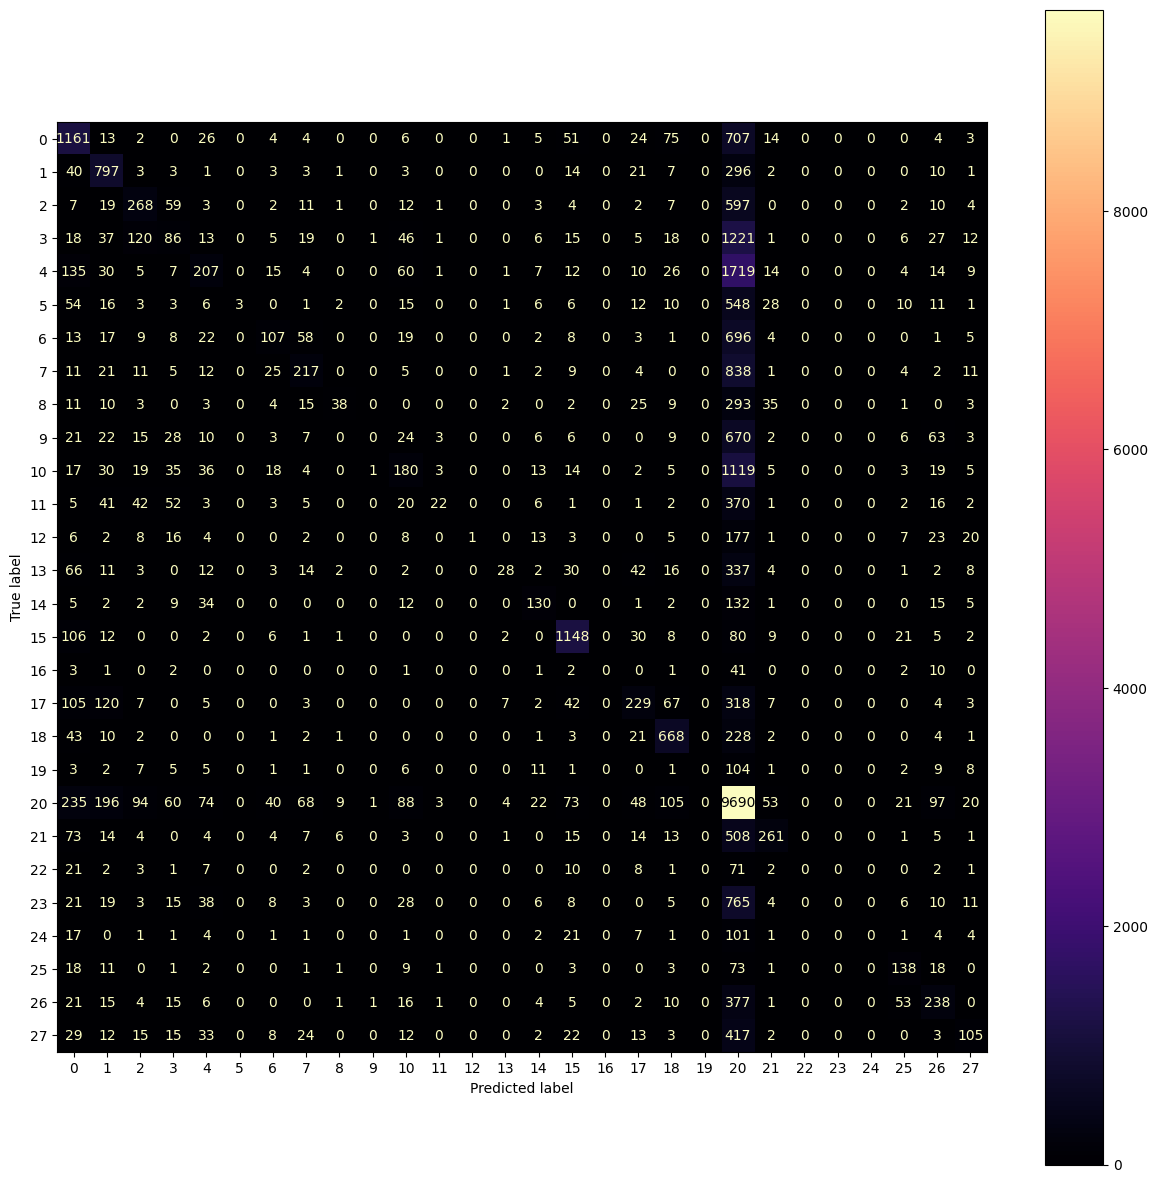

In [33]:
if (os.path.exists('models/MLP1GridCV_model.pickle') and not skip):
    y_emo_predict = clf1.best_estimator_.predict(X_test)
    metrics(yemo_test,y_emo_predict)
    print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
    metrics(yemo_test,y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
    fig, ax = plt.subplots(figsize=(15,15))
    cmp.plot(ax=ax,cmap='magma')
else:
    print("skipped")

Accuracy: 0.6336864160167617
Precision (Weighted): 0.6323934037009226
F1 Score (Weighted): 0.6282439382745637
F1 Score (Macro): 0.5922178755540198
              precision    recall  f1-score   support

           0       0.59      0.34      0.43      3817
           1       0.63      0.59      0.61      7616
           2       0.57      0.64      0.60     11001
           3       0.71      0.75      0.73     11930

    accuracy                           0.63     34364
   macro avg       0.62      0.58      0.59     34364
weighted avg       0.63      0.63      0.63     34364

Best estimator (Sentiment): MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(5, 10), max_iter=5, verbose=True), Best Score: 0.5612705192148834


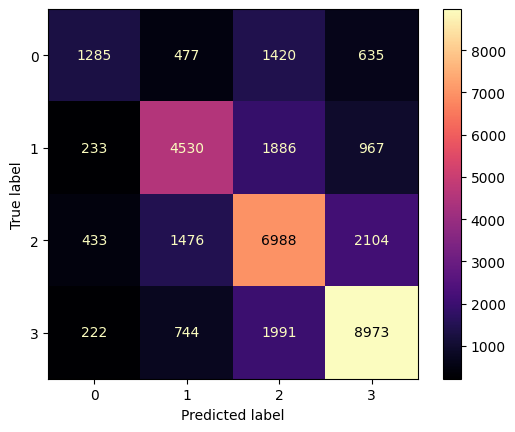

In [34]:
if (os.path.exists('models/MLP2GridCV_model.pickle') and not skip):
    y_sent_predict = clf2.best_estimator_.predict(X_test)
    metrics(ysent_test,y_sent_predict)
    print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
    ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")

<h3>2.5</h3>
Test/Training split: 80/20 -> 50/50
Anticipated effect: increased accuracy but poor generalization


In [35]:
post = file[0]
vectorizer = CountVectorizer()
#vectorize posts into words that were used
# file[0] = vectorizer.fit_transform(post)
X = vectorizer.fit_transform(file[0])
# X_features =vectorizer.get_feature_names_out()

leEmo = preprocessing.LabelEncoder()
leSent = preprocessing.LabelEncoder()
#list(le.inverse_transform([2, 2, 1]))
encodedEmo = leEmo.fit_transform(file[1])  #change 0 to the column of emotions with no separation
#vectorize sentiments
encodedSentiment = leSent.fit_transform(file[2])  #change 0 to the column of sentiment with no separation



In [36]:
X_train, X_test, yemo_train, yemo_test, ysent_train, ysent_test = train_test_split(X, encodedEmo, encodedSentiment,test_size=0.5, train_size=0.5)

<h2>Multinomial Naive Bayes Classifier (naive bayes.MultinomialNB.html) using new test train split</h2>

In [37]:
classifier = MultinomialNB()
if (os.path.exists('models/new_split/MNB1_model_new_split.pickle')):
    pickle_in = open('models/new_split/MNB1_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")

else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/new_split/MNB1_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/MNB1_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/new_split/MNB2_model_new_split.pickle')):
    pickle_in = open('models/new_split/MNB2_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, ysent_train)
    with open('models/new_split/MNB2_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/MNB2_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MultinomialNB from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Score for Emotion: 0.45034338260970785
Accuracy: 0.45034338260970785
Precision (Weighted): 0.4966536518072621
F1 Score (Weighted): 0.39090994025252473
F1 Score (Macro): 0.24964479685436372
              precision    recall  f1-score   support

           0       0.54      0.55      0.54      5198
           1       0.62      0.43      0.50      2999
           2       0.53      0.22      0.31      2601
           3       0.41      0.16      0.23      4126
           4       0.47      0.19      0.27      5639
           5       0.46      0.13      0.21      1783
           6       0.57      0.13      0.21      2483
           7       0.56      0.19      0.28      2977
           8       0.64      0.08      0.15      1049
           9       0.51      0.10      0.17      2431
          10       0.47      0.17      0.25      3909
          11       0.58      0.14      0.23      1469
          12       0.56      0.03      0.05       701
          13       0.56      0.09      0.15      1526


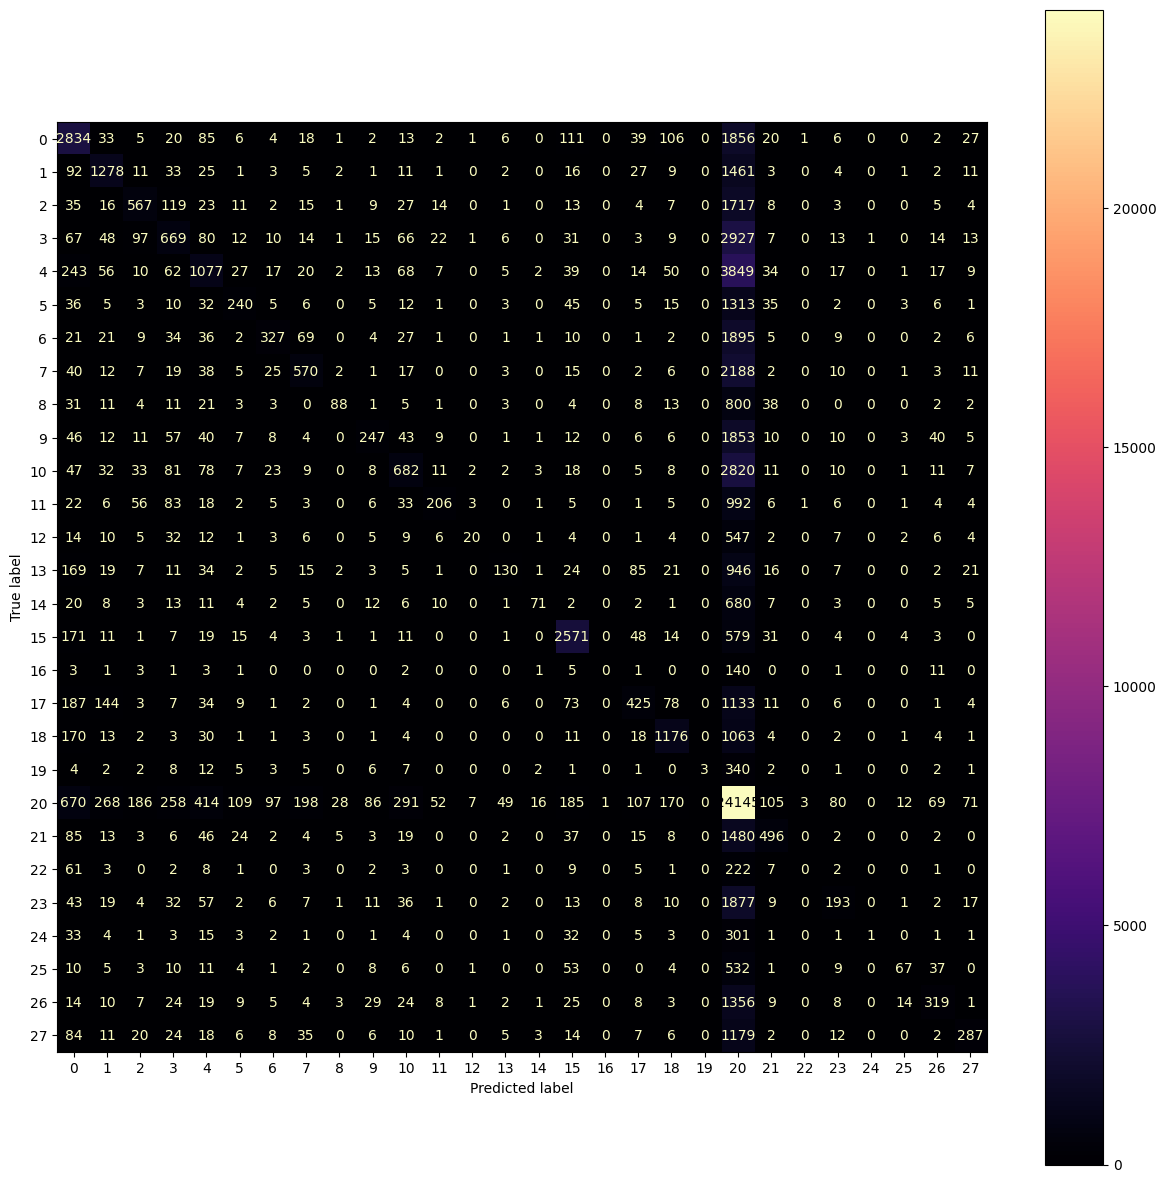

In [38]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test, yemo_test)}")
metrics(yemo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15, 15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiment: 0.6165987661506227
Accuracy: 0.6165987661506227
Precision (Weighted): 0.6118225189830038
F1 Score (Weighted): 0.6107362391048107
F1 Score (Macro): 0.5794222950430572
              precision    recall  f1-score   support

           0       0.55      0.35      0.43      9551
           1       0.61      0.61      0.61     19355
           2       0.58      0.57      0.57     27677
           3       0.66      0.75      0.70     29327

    accuracy                           0.62     85910
   macro avg       0.60      0.57      0.58     85910
weighted avg       0.61      0.62      0.61     85910



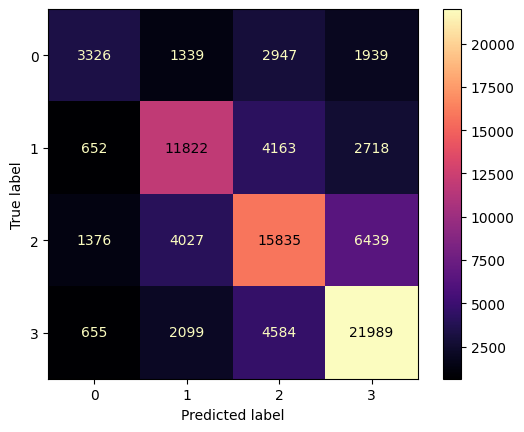

In [39]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test, ysent_test)}")
metrics(ysent_test, y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Decision Tree (tree.DecisionTreeClassifier) using new test train split</h2>

In [40]:
classifier = DecisionTreeClassifier()
if (os.path.exists('models/new_split/DT1_model_new_split.pickle')):
    pickle_in = open('models/new_split/DT1_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/new_split/DT1_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)
    pickle_in = open('models/new_split/DT1_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/new_split/DT2_model_new_split.pickle')):
    pickle_in = open('models/new_split/DT2_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, ysent_train)
    with open('models/new_split/DT2_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)
    pickle_in = open('models/new_split/DT2_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Score for Emotion: 0.6205563962286114
Accuracy: 0.6205563962286114
Precision (Weighted): 0.6310744538157668
F1 Score (Weighted): 0.6151693231958857
F1 Score (Macro): 0.5367068851222239
              precision    recall  f1-score   support

           0       0.59      0.83      0.69      5198
           1       0.59      0.83      0.69      2999
           2       0.48      0.70      0.57      2601
           3       0.42      0.58      0.49      4126
           4       0.49      0.54      0.52      5639
           5       0.50      0.58      0.54      1783
           6       0.53      0.57      0.55      2483
           7       0.61      0.61      0.61      2977
           8       0.53      0.53      0.53      1049
           9       0.49      0.45      0.47      2431
          10       0.59      0.49      0.54      3909
          11       0.60      0.42      0.49      1469
          12       0.55      0.40      0.46       701
          13       0.57      0.41      0.48      1526
    

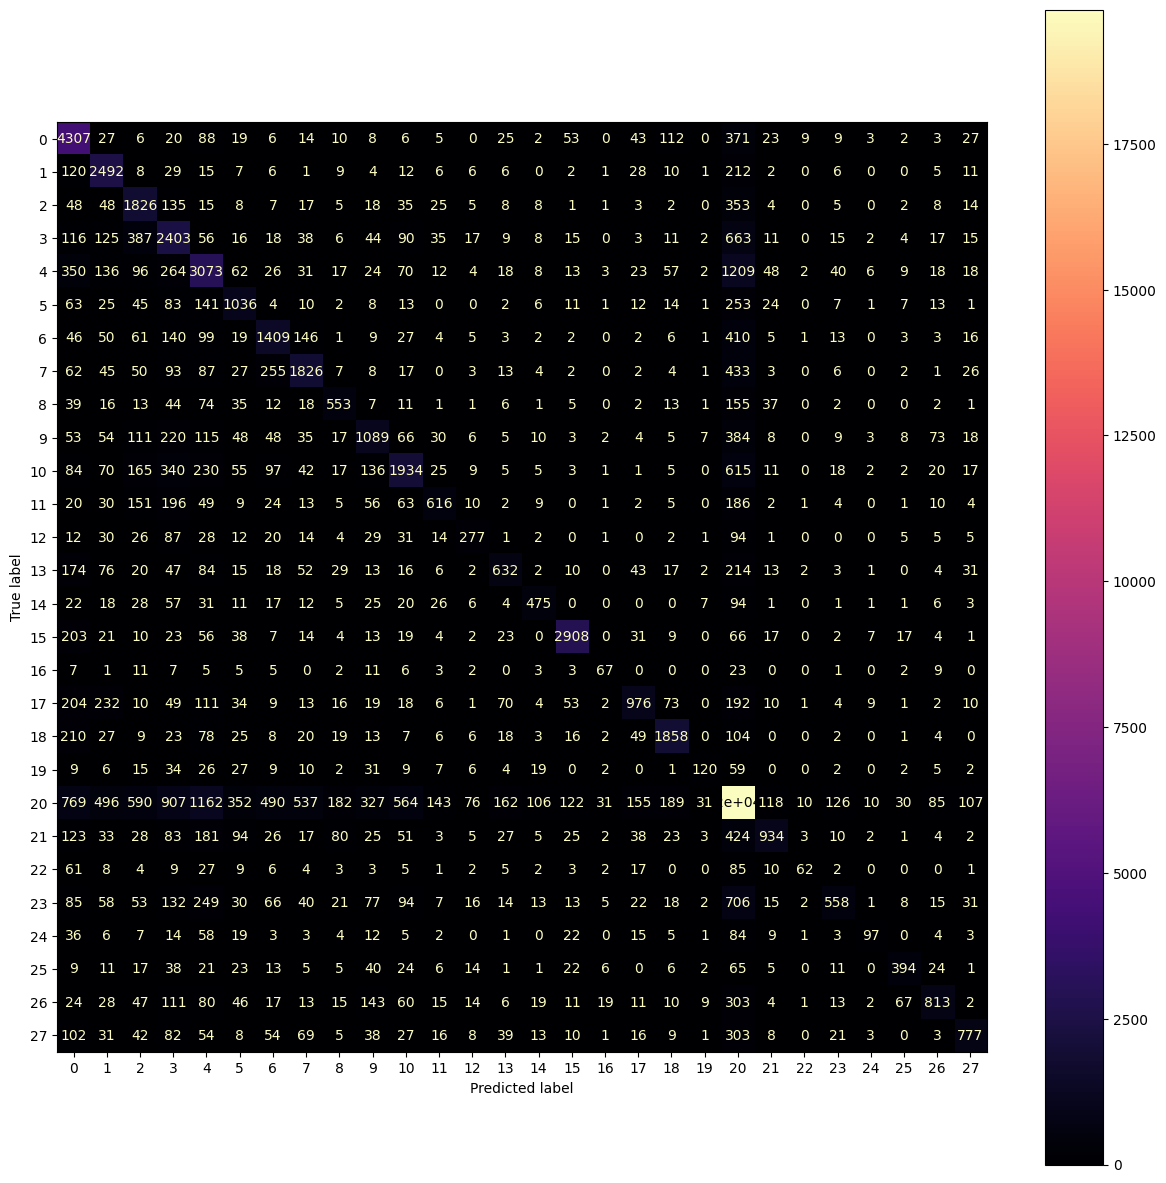

In [41]:
y_emo_predict = clf1.predict(X_test)

print(f"Score for Emotion: {clf1.score(X_test, yemo_test)}")
metrics(yemo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15, 15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiment: 0.7401233849377256
Accuracy: 0.7401233849377256
Precision (Weighted): 0.7474487673615592
F1 Score (Weighted): 0.7417793633642807
F1 Score (Macro): 0.7264439740990356
              precision    recall  f1-score   support

           0       0.61      0.71      0.65      9551
           1       0.70      0.79      0.74     19355
           2       0.73      0.70      0.71     27677
           3       0.84      0.76      0.80     29327

    accuracy                           0.74     85910
   macro avg       0.72      0.74      0.73     85910
weighted avg       0.75      0.74      0.74     85910



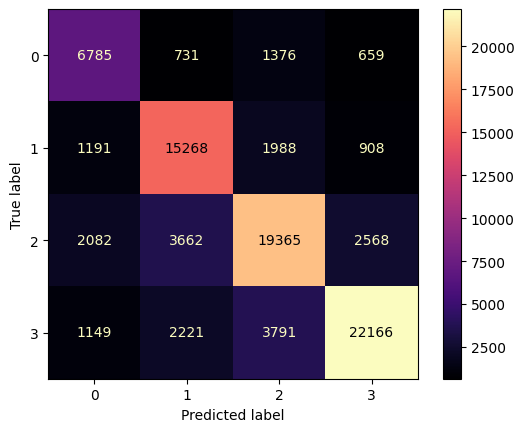

In [42]:
y_sent_predict = clf2.predict(X_test)

print(f"Score for Sentiment: {clf2.score(X_test, ysent_test)}")
metrics(ysent_test, y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multi-Layered Perceptron (neural network.MLPClassifier) using new test train split</h2>

<b>Did not converge timed out</b>

In [43]:
classifier = MLPClassifier()
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1_model_new_split.pickle')):
        pickle_in = open('models/new_split/MLP1_model_new_split.pickle', 'rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        MLP1 = classifier.fit(X_train, yemo_train)
        with open('models/new_split/MLP1_model_new_split.pickle', 'wb') as f:
            pickle.dump(classifier, f)
        pickle_in = open('models/new_split/MLP1_model_new_split.pickle', 'rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2_model_new_split.pickle')):
        pickle_in = open('models/new_split/MLP2_model_new_split.pickle', 'rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        MLP2 = classifier.fit(X_train, ysent_train)
        with open('models/new_split/MLP2_model_new_split.pickle', 'wb') as f:
            pickle.dump(classifier, f)
        pickle_in = open('models/new_split/MLP2_model_new_split.pickle', 'rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


pickle file used
pickle file used


Score for Emotion: 0.5970317774415086
Accuracy: 0.5970317774415086
Precision (Weighted): 0.5890730582332856
F1 Score (Weighted): 0.5886686134958216
F1 Score (Macro): 0.5216986396668292
              precision    recall  f1-score   support

           0       0.64      0.72      0.68      5198
           1       0.66      0.70      0.68      2999
           2       0.59      0.47      0.52      2601
           3       0.47      0.39      0.43      4126
           4       0.55      0.38      0.45      5639
           5       0.52      0.48      0.50      1783
           6       0.58      0.41      0.48      2483
           7       0.58      0.56      0.57      2977
           8       0.48      0.57      0.52      1049
           9       0.49      0.37      0.42      2431
          10       0.53      0.47      0.50      3909
          11       0.51      0.47      0.49      1469
          12       0.41      0.52      0.46       701
          13       0.48      0.42      0.45      1526
    

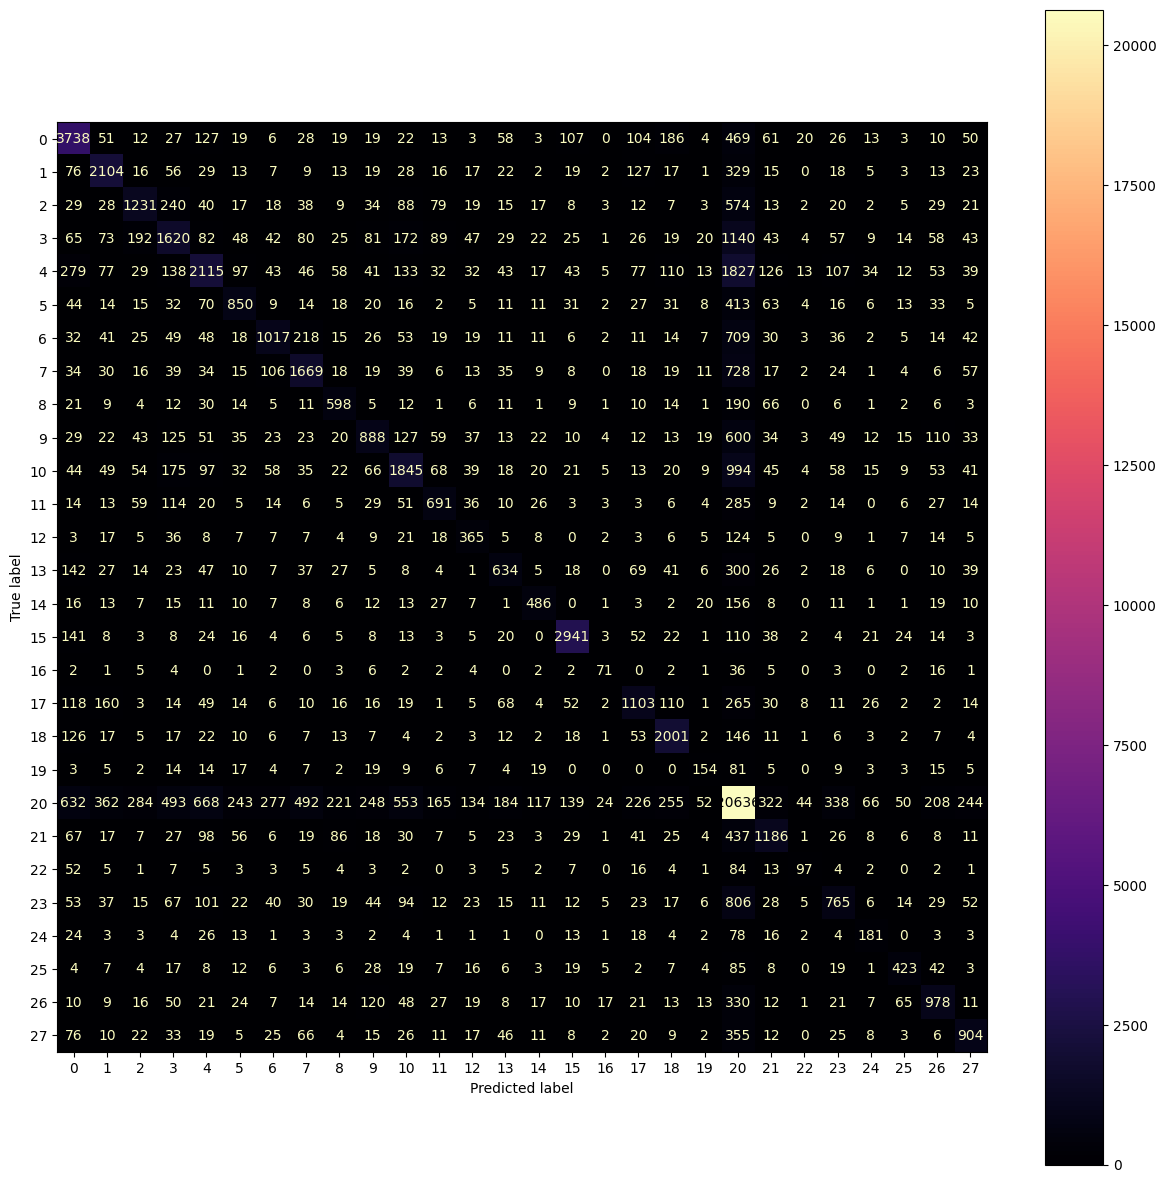

In [44]:

if (os.path.exists('models/new_split/MLP1_model_new_split.pickle') and not skip):
    y_emo_predict = clf1.predict(X_test)
    print(f"Score for Emotion: {clf1.score(X_test, yemo_test)}")
    metrics(yemo_test, y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
    fig, ax = plt.subplots(figsize=(15, 15))
    cmp.plot(ax=ax, cmap='magma')
else:
    print("skipped")

Score for Sentiment: 0.7254103131183797
Accuracy: 0.7254103131183797
Precision (Weighted): 0.7245018512900687
F1 Score (Weighted): 0.7246752304375222
F1 Score (Macro): 0.7049668048803107
              precision    recall  f1-score   support

           0       0.65      0.58      0.61      9551
           1       0.71      0.73      0.72     19355
           2       0.70      0.70      0.70     27677
           3       0.79      0.80      0.79     29327

    accuracy                           0.73     85910
   macro avg       0.71      0.70      0.70     85910
weighted avg       0.72      0.73      0.72     85910



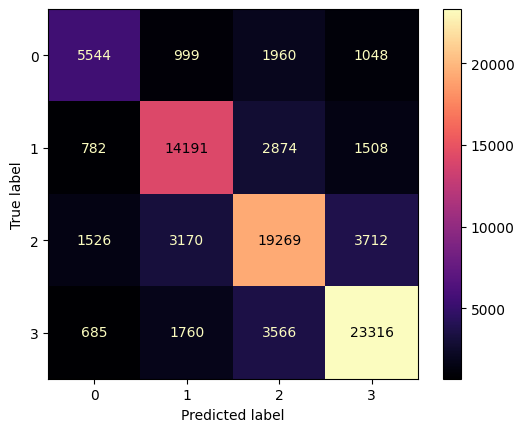

In [45]:
if (os.path.exists('models/new_split/MLP1_model_new_split.pickle') and not skip):
    y_sent_predict = clf2.predict(X_test)

    print(f"Score for Sentiment: {clf2.score(X_test, ysent_test)}")
    metrics(ysent_test, y_sent_predict)
    ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")

<h2>Multinomial Naive Bayes Classifier found using GridSearchCV and new test train split</h2>

input parameter requires a model object

using the following alpha parameters 0.5,0,0.36,1

In [46]:
parameters = {"alpha": (0.5, 0, 0.36, 1)}
clfMNB = MultinomialNB()

classifier = GridSearchCV(estimator=clfMNB, param_grid=parameters, n_jobs=-1)

if (os.path.exists('models/new_split/MNB1GridCV_model_new_split.pickle')):
    pickle_in = open('models/new_split/MNB1GridCV_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/new_split/MNB1GridCV_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/MNB1GridCV_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/new_split/MNB2GridCV_model_new_split.pickle')):
    pickle_in = open('models/new_split/MNB2GridCV_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, ysent_train)
    with open('models/new_split/MNB2GridCV_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/MNB2GridCV_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MultinomialNB from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Best estimator (Emotion): MultinomialNB(alpha=0.5), Best Score: 0.3905984755012737
Accuracy: 0.48643929693865673
Precision (Weighted): 0.4900742654415888
F1 Score (Weighted): 0.45576722571703804
F1 Score (Macro): 0.3457647433853822
              precision    recall  f1-score   support

           0       0.54      0.61      0.57      5198
           1       0.59      0.59      0.59      2999
           2       0.49      0.34      0.40      2601
           3       0.40      0.24      0.30      4126
           4       0.44      0.25      0.32      5639
           5       0.40      0.28      0.33      1783
           6       0.48      0.25      0.33      2483
           7       0.50      0.31      0.38      2977
           8       0.54      0.21      0.31      1049
           9       0.46      0.19      0.27      2431
          10       0.44      0.28      0.34      3909
          11       0.54      0.26      0.35      1469
          12       0.57      0.14      0.23       701
          1

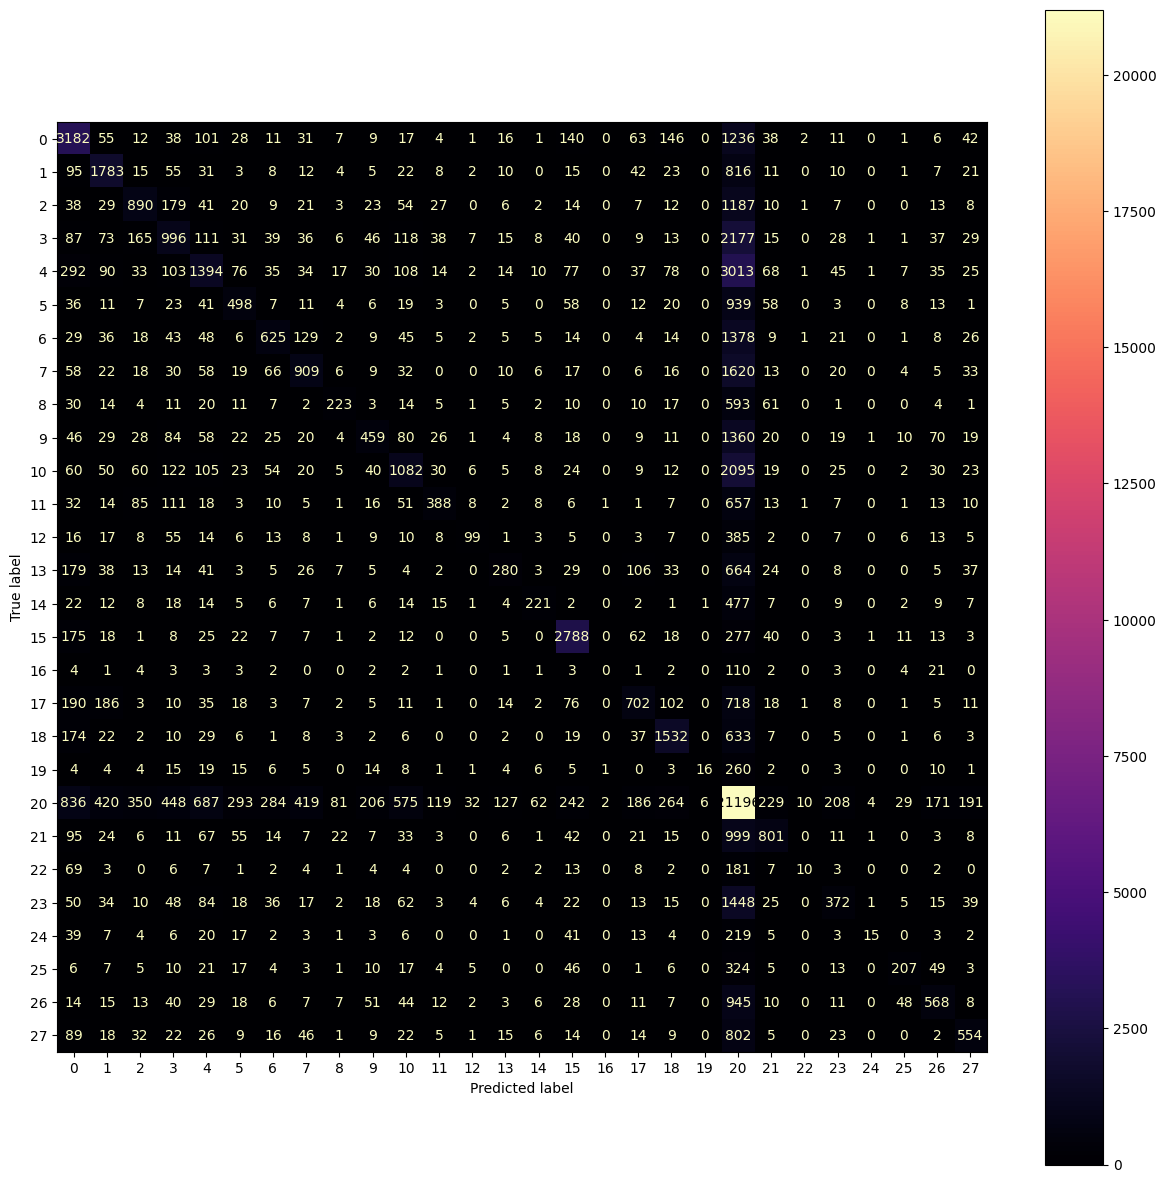

In [47]:
y_emo_predict = clf1.best_estimator_.predict(X_test)

print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
metrics(yemo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15, 15))
cmp.plot(ax=ax, cmap='magma')


Best estimator (Sentiment): MultinomialNB(alpha=1), Best Score: 0.543696292227927
Accuracy: 0.6165987661506227
Precision (Weighted): 0.6118225189830038
F1 Score (Weighted): 0.6107362391048107
F1 Score (Macro): 0.5794222950430572
              precision    recall  f1-score   support

           0       0.55      0.35      0.43      9551
           1       0.61      0.61      0.61     19355
           2       0.58      0.57      0.57     27677
           3       0.66      0.75      0.70     29327

    accuracy                           0.62     85910
   macro avg       0.60      0.57      0.58     85910
weighted avg       0.61      0.62      0.61     85910



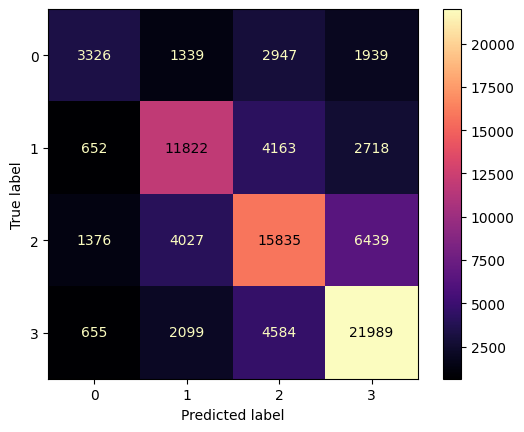

In [48]:
y_sent_predict = clf2.best_estimator_.predict(X_test)

print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
metrics(ysent_test, y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>DecisionTree Classifier found using GridSearchCV and new test train split </h2>

input parameter requires a model object

using the various value for the following parameters: criterion, max_depth, min_samples

In [49]:
parameters = {"criterion": ("gini", "entropy"), "max_depth": (100, 3), "min_samples_split": (12, 5, 30)}
clfDT = DecisionTreeClassifier()

classifier = GridSearchCV(estimator=clfDT, param_grid=parameters, n_jobs=-1)

if (os.path.exists('models/new_split/DT1GridCV_model_new_split.pickle')):
    pickle_in = open('models/new_split/DT1GridCV_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, yemo_train)
    with open('models/new_split/DT1GridCV_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/DT1GridCV_model_new_split.pickle', 'rb')
    clf1 = pickle.load(pickle_in)

if (os.path.exists('models/new_split/DT2GridCV_model_new_split.pickle')):
    pickle_in = open('models/new_split/DT2GridCV_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)
    print("pickle file used")
else:
    classifier = classifier.fit(X_train, ysent_train)
    with open('models/new_split/DT2GridCV_model_new_split.pickle', 'wb') as f:
        pickle.dump(classifier, f)

    pickle_in = open('models/new_split/DT2GridCV_model_new_split.pickle', 'rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


Best estimator (Emotion): DecisionTreeClassifier(max_depth=100, min_samples_split=30), Best Score: 0.3984285880572692
Accuracy: 0.4697939704341753
Precision (Weighted): 0.46031786735302543
F1 Score (Weighted): 0.42406055371566664
F1 Score (Macro): 0.32120872299649167
              precision    recall  f1-score   support

           0       0.54      0.52      0.53      5198
           1       0.57      0.58      0.57      2999
           2       0.45      0.28      0.34      2601
           3       0.31      0.16      0.21      4126
           4       0.34      0.15      0.21      5639
           5       0.35      0.15      0.21      1783
           6       0.42      0.21      0.28      2483
           7       0.45      0.21      0.29      2977
           8       0.45      0.27      0.34      1049
           9       0.38      0.14      0.20      2431
          10       0.32      0.15      0.20      3909
          11       0.43      0.20      0.27      1469
          12       0.47      

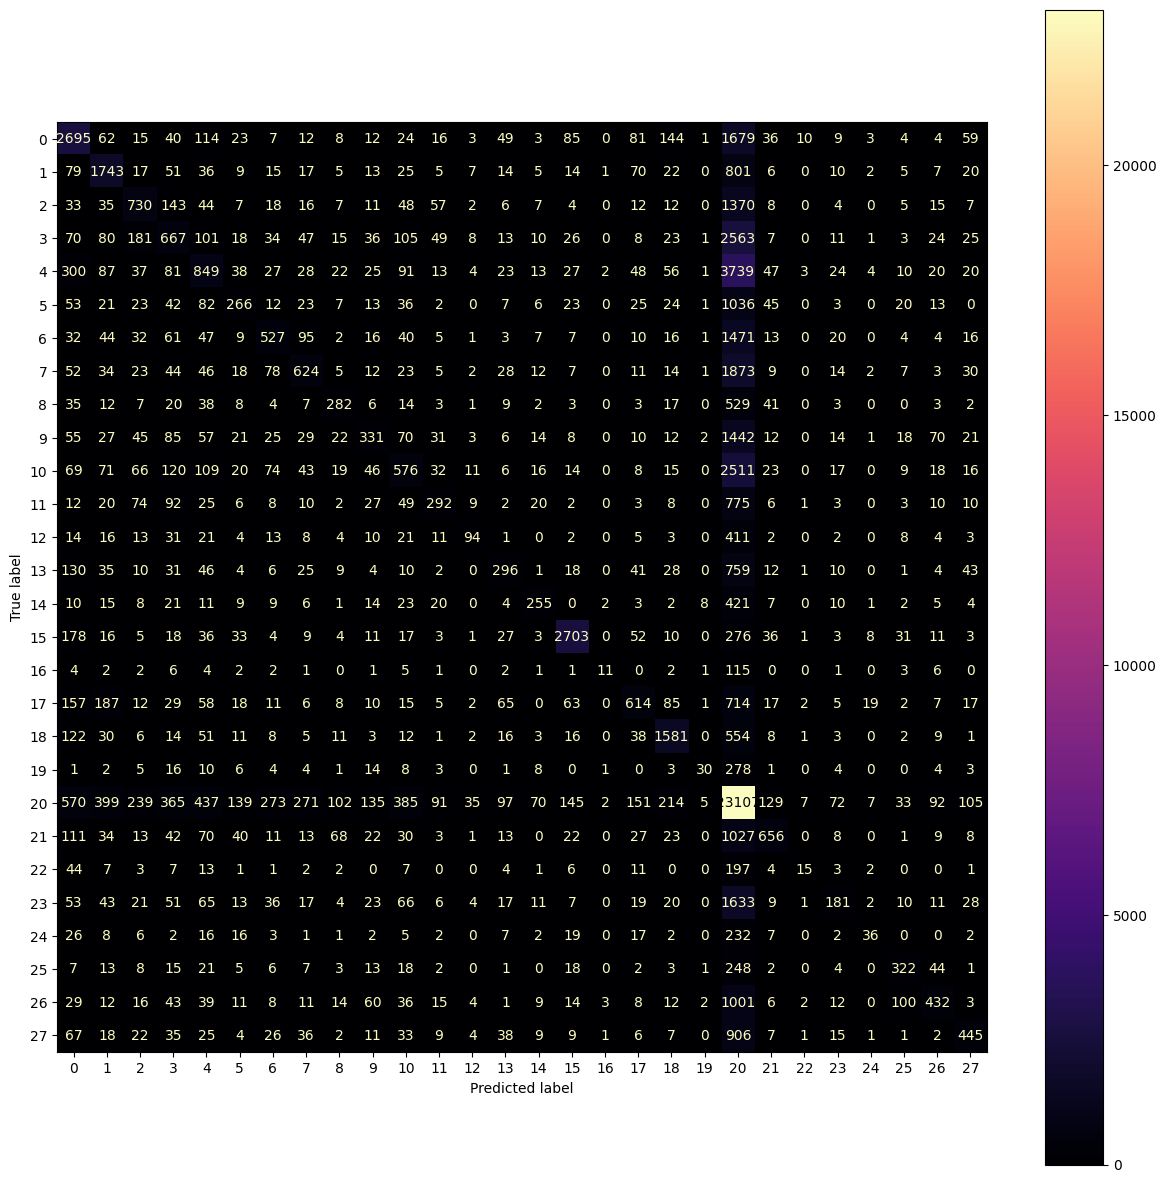

In [50]:
y_emo_predict = clf1.best_estimator_.predict(X_test)

print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
metrics(yemo_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15, 15))
cmp.plot(ax=ax, cmap='magma')


Best estimator (Sentiment): DecisionTreeClassifier(max_depth=100, min_samples_split=5), Best Score: 0.49976719823070653
Accuracy: 0.5817949016412525
Precision (Weighted): 0.6276239572925078
F1 Score (Weighted): 0.5800473786216328
F1 Score (Macro): 0.5476340828771707
              precision    recall  f1-score   support

           0       0.52      0.34      0.41      9551
           1       0.64      0.45      0.53     19355
           2       0.47      0.78      0.59     27677
           3       0.80      0.56      0.66     29327

    accuracy                           0.58     85910
   macro avg       0.61      0.53      0.55     85910
weighted avg       0.63      0.58      0.58     85910



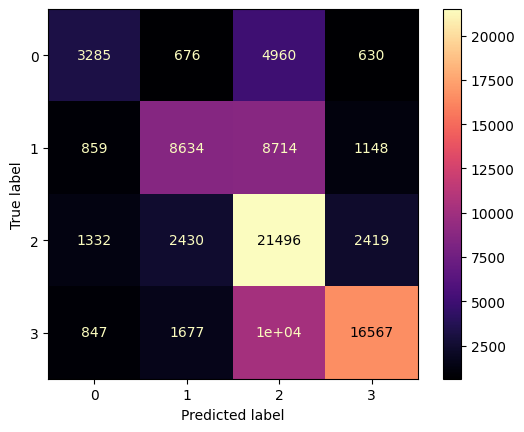

In [51]:
y_sent_predict = clf2.best_estimator_.predict(X_test)

print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
metrics(ysent_test, y_sent_predict)
ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')

<h2>Multi-Layered Perceptron found using GridSearchCV and new test train split</h2>

input parameter requires a model object

using the various value for the following parameters: activation, architectures, solvers
Hidden layers <a href="https://datascience.stackexchange.com/questions/19768/how-to-implement-pythons-mlpclassifier-with-gridsearchcv">Link</a>

<b>Unable to converge</b>


In [52]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True,verbose=True, max_iter=5)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters, n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1GridCV_model_new_split.pickle')):
        pickle_in = open('models/new_split/MLP1GridCV_model_new_split.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_train, yemo_train)
        with open('models/new_split/MLP1GridCV_model_new_split.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP1GridCV_model_new_split.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2GridCV_model_new_split.pickle')):
        pickle_in = open('models/new_split/MLP2GridCV_model_new_split.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_train,ysent_train)
        with open('models/new_split/MLP2GridCV_model_new_split.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP2GridCV_model_new_split.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

pickle file used
pickle file used


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.1.2 wh

Accuracy: 0.43632871609824236
Precision (Weighted): 0.37904428680905167
F1 Score (Weighted): 0.343531763415554
F1 Score (Macro): 0.2032812393531239


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

              precision    recall  f1-score   support

           0       0.46      0.55      0.50      5198
           1       0.56      0.61      0.58      2999
           2       0.39      0.09      0.15      2601
           3       0.21      0.01      0.03      4126
           4       0.42      0.06      0.10      5639
           5       0.24      0.04      0.07      1783
           6       0.34      0.10      0.15      2483
           7       0.27      0.13      0.18      2977
           8       0.45      0.15      0.22      1049
           9       0.00      0.00      0.00      2431
          10       0.31      0.02      0.03      3909
          11       0.55      0.10      0.16      1469
          12       0.00      0.00      0.00       701
          13       0.35      0.01      0.03      1526
          14       0.00      0.00      0.00       871
          15       0.80      0.78      0.79      3499
          16       0.00      0.00      0.00       173
          17       0.34    

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.46      0.55      0.50      5198
           1       0.56      0.61      0.58      2999
           2       0.39      0.09      0.15      2601
           3       0.21      0.01      0.03      4126
           4       0.42      0.06      0.10      5639
           5       0.24      0.04      0.07      1783
           6       0.34      0.10      0.15      2483
           7       0.27      0.13      0.18      2977
           8       0.45      0.15      0.22      1049
           9       0.00      0.00      0.00      2431
          10       0.31      0.02      0.03      3909
          11       0.55      0.10      0.16      1469
          12       0.00      0.00      0.00       701
          13       0.35      0.01      0.03      1526
          14       0.00      0.00      0.00       871
          15       0.80      0.78      0.79      3499
          16       0.00      0.00      0.00       173
          17       0.34    

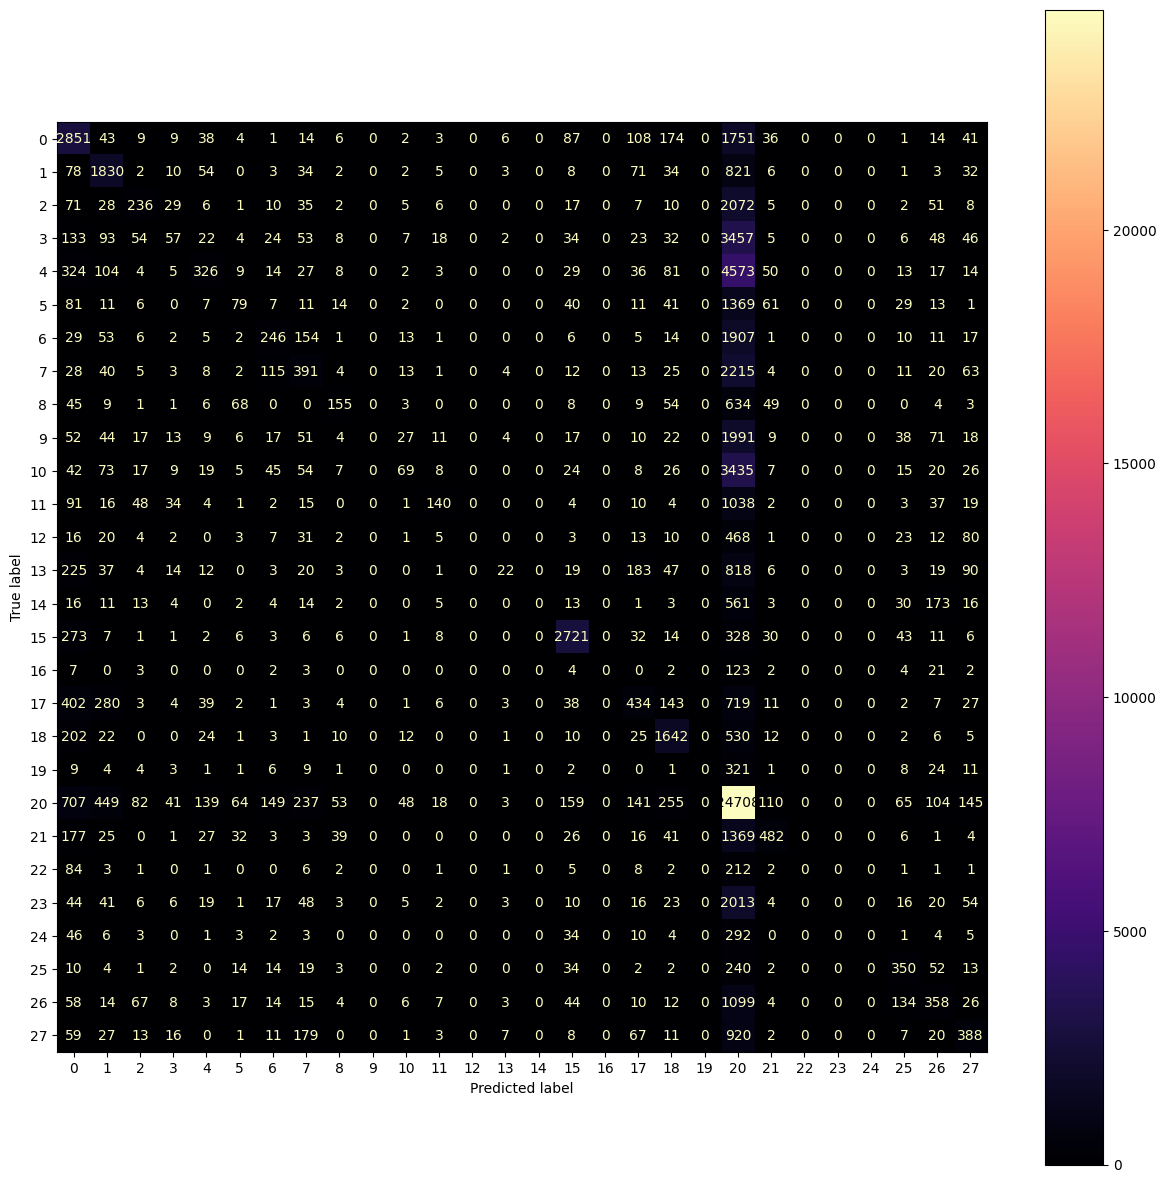

In [53]:
if (os.path.exists('models/new_split/MLP1GridCV_model_new_split.pickle') and not skip):
    y_emo_predict = clf1.best_estimator_.predict(X_test)
    metrics(yemo_test,y_emo_predict)
    print(f"Best estimator (Emotion): {clf1.best_estimator_}, Best Score: {clf1.best_score_}")
    metrics(yemo_test,y_emo_predict)
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=yemo_test,y_pred= y_emo_predict))
    fig, ax = plt.subplots(figsize=(15,15))
    cmp.plot(ax=ax,cmap='magma')
else:
    print("skipped")

Accuracy: 0.6048539168897684
Precision (Weighted): 0.6047268099384585
F1 Score (Weighted): 0.6011410032175559
F1 Score (Macro): 0.564593889316154
              precision    recall  f1-score   support

           0       0.52      0.32      0.40      9551
           1       0.59      0.58      0.58     19355
           2       0.53      0.61      0.57     27677
           3       0.71      0.71      0.71     29327

    accuracy                           0.60     85910
   macro avg       0.59      0.55      0.56     85910
weighted avg       0.60      0.60      0.60     85910

Best estimator (Sentiment): MLPClassifier(activation='tanh', early_stopping=True, hidden_layer_sizes=(5, 5),
              max_iter=5, verbose=True), Best Score: 0.5505296240251426


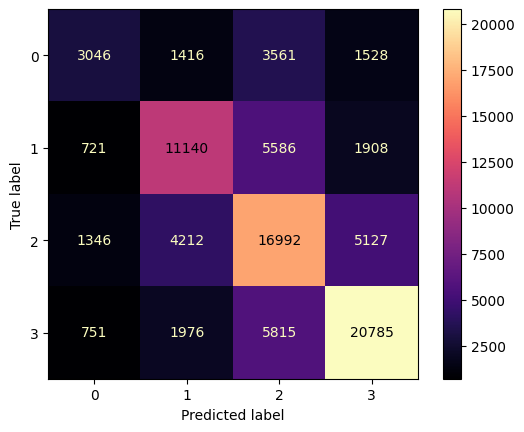

In [54]:
if (os.path.exists('models/new_split/MLP2GridCV_model_new_split.pickle') and not skip):
    y_sent_predict = clf2.best_estimator_.predict(X_test)
    metrics(ysent_test,y_sent_predict)
    print(f"Best estimator (Sentiment): {clf2.best_estimator_}, Best Score: {clf2.best_score_}")
    ConfusionMatrixDisplay.from_predictions(y_true=ysent_test, y_pred=y_sent_predict, cmap='magma')
else:
    print("skipped")

<h3>3. Embedding as features</h3>

requires install of library gensim

pip install gensim

https://radimrehurek.com/gensim/models/word2vec.html


In [55]:
# result.most_similar("cat")

In [56]:
if (os.path.exists('models/word2vec.pickle')):
    pickle_in = open('models/word2vec.pickle','rb')
    word2vec = pickle.load(pickle_in)
    print("pickle file used")
else:
    model =gensim.downloader.load("word2vec-google-news-300")
    with open('models/word2vec.pickle','wb') as f:
        pickle.dump(model, f)

    pickle_in = open('models/word2vec.pickle','rb')
    word2vec = pickle.load(pickle_in)

pickle file used


In [57]:
nltk.download('punkt')
#post.str.lower()
tokenized_word = [word_tokenize(i) for i in post]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\girou\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
post_tokens = [post_tokens for post_tokens in tokenized_word] #http://librarycarpentry.org/lc-tdm/aio/index.html
print("Number of tokens in Reddit posts:")
tokens_list = []
for i in post_tokens:
    for j in i:
        tokens_list.append(j)
print(len(tokens_list))

Number of tokens in Reddit posts:
2642128


In [59]:
X_embed_train,X_embed_test, y_embed_emotions_train, y_embed_emotions_test, y_embed_sentiments_train, y_embed_sentiments_test= train_test_split(post_tokens, encodedEmo, encodedSentiment, test_size = 0.2, train_size=0.8)

In [60]:
# average_embedding_training = []
# average_embedding_test = []
# average_embedding_total = []
# key_error = False
# missed = 0
# # model = gensim.models
model = gensim.downloader.load("word2vec-google-news-300")

# for post in X_train_emb:
#     token_embeddings = []
#     for words in post:
#         key_error = False
#         try:
#             token_embeddings.append(model[words])
#         except KeyError:
#             key_error = True
#             missed = missed + 1
#     average_embedding_training.append(np.mean(token_embeddings,axis=0))

# print('Hit rate of training set:')
# print(1 - (missed/len(tokens_list)))
    
# missed=0
    
# for post in X_test_emb:
#     token_embeddings = []
#     for words in post:
#         key_error = False
#         try:
#             token_embeddings.append(model[words])
#         except KeyError:
#             key_error = True
#             missed = missed + 1
#     average_embedding_test.append(np.mean(token_embeddings,axis=0))

# print('Hit rate of test set:')
# print(1 - (missed/len(tokens_list)))

# for i in range(len(average_embedding_training)):
#     average_embedding_training[i] = np.array(average_embedding_training[i])
# for i in range(len(average_embedding_test)):
#     average_embedding_test[i] = np.array(average_embedding_test[i])


posts_tokens_in_model_training = [] # List of posts but with only the tokens that are in the model
number_tokens_after_removal_training = 0
# Removing words that are not in the Google model
for post in X_embed_train:
    post_with_unmodeled_words_removed_train = [] # Post with the unmodeled words removed
    for word in post:
        if word in model:
            post_with_unmodeled_words_removed_train.append(word)
        else:
            continue
    posts_tokens_in_model_training.append(post_with_unmodeled_words_removed_train)
    number_tokens_after_removal_training += len(post_with_unmodeled_words_removed_train)

# Calculating the average embed for each post in the training set
average_embeds_train = []
for post in posts_tokens_in_model_training:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) # Get the embedding for each word in the post, model[word] returns the embedding for the word
    # axis = 0 means that we are averaging the rows
    average_embeds_train.append(np.mean(token_embeddings,axis=0)) # use np.mean() to get the average of the embeddings for the words in the post


# ~~~~~~~~~~~Test set:
posts_tokens_in_model_test = [] # List of posts but with only the tokens that are in the model
number_tokens_after_removal_test = 0
# Removing words that are not in the Google model
for post in X_embed_test:
    post_with_unmodeled_words_removed_test = [] # Post with the unmodeled words removed
    for word in post:
        if word in model:
            post_with_unmodeled_words_removed_test.append(word)
        else:
            continue
    posts_tokens_in_model_test.append(post_with_unmodeled_words_removed_test)
    number_tokens_after_removal_test += len(post_with_unmodeled_words_removed_test)
    
# Calculating the average embed for each post in the test set
average_embeds_test = []
for post in posts_tokens_in_model_test:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) # Get the embedding for each word in the post, model[word] returns the embedding for the word
    average_embeds_test.append(np.mean(token_embeddings,axis=0)) # use np.mean() to get the average of the embeddings for the words in the post

# Setting the training and test sets to the average embeddings
X_embed_avg_train = average_embeds_train
X_embed_avg_test = average_embeds_test
print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shape of training set: (137456,)
Shape of test set: (34364,)


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [61]:
#Remove empty posts from training and test sets and the corresponding labels

print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
print(np.shape(y_embed_emotions_test))

# Remove all empty posts from the training set (if the shape isn't 300 it's bad!)
for i in range(len(X_embed_avg_train)):
    if i >= len(X_embed_avg_train):
        break
    if X_embed_avg_train[i].shape == (300,):
        continue
    else:
        X_embed_avg_train.pop(i)
        y_embed_emotions_train = np.delete(y_embed_emotions_train, i)
        y_embed_sentiments_train = np.delete(y_embed_sentiments_train, i)

# Remove all empty posts from the test set (if the shape isn't 300 it's bad!)
for i in range(len(X_embed_avg_test)):
    if i >= len(X_embed_avg_test):
        break
    if X_embed_avg_test[i].shape == (300,):
        continue
    else:
        X_embed_avg_test.pop(i)
        y_embed_emotions_test = np.delete(y_embed_emotions_test, i)
        y_embed_sentiments_test = np.delete(y_embed_sentiments_test, i)

#print shape of training and test sets
print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
print(np.shape(y_embed_emotions_test))

# Turn all the posts into regular np arrays since otherwise we get: ValueError: Setting an array element with a sequence.
for i in range(len(X_embed_avg_train)):
    X_embed_avg_train[i] = np.array(X_embed_avg_train[i])

for i in range(len(X_embed_avg_test)):
    X_embed_avg_test[i] = np.array(X_embed_avg_test[i])

Shape of test set: (34364,)
(34364,)
Shape of training set: (137387,)
Shape of test set: (34347, 300)
(34347,)


In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [63]:
# classifier = MLPClassifier()
classifier = MLPClassifier(max_iter=3)

if (os.path.exists('models/Embeddings_MLP_model.pickle')):
    pickle_in = open('models/Embeddings_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP = classifier.fit(X_embed_avg_train, y_embed_emotions_train)
    with open('models/Embeddings_MLP_model.pickle','wb') as f:
            pickle.dump(EMLP, f)
    pickle_in = open('models/Embeddings_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

        
if (os.path.exists('models/Embeddings_MLP_model2.pickle')):
    pickle_in = open('models/Embeddings_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP2 = classifier.fit(X_embed_avg_train, y_embed_sentiments_train)
    with open('models/Embeddings_MLP_model2.pickle','wb') as f:
            pickle.dump(EMLP2, f)
    pickle_in = open('models/Embeddings_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)


pickle file used
pickle file used


In [64]:
print(np.shape(X_embed_avg_train))
print(np.shape(y_embed_emotions_train))

(137387,)
(137387,)


Score for Emotions: 0.4043147873176697
Accuracy: 0.4043147873176697
Precision (Weighted): 0.38637802914037156
F1 Score (Weighted): 0.30998703784443216
F1 Score (Macro): 0.17442836854303995
              precision    recall  f1-score   support

           0       0.47      0.40      0.43      2065
           1       0.48      0.38      0.42      1269
           2       0.37      0.18      0.25      1081
           3       0.21      0.02      0.04      1711
           4       0.42      0.03      0.06      2274
           5       0.31      0.05      0.09       721
           6       0.56      0.02      0.04       982
           7       0.34      0.08      0.13      1158
           8       0.58      0.07      0.13       414
           9       0.45      0.02      0.03       952
          10       0.22      0.04      0.06      1530
          11       0.40      0.09      0.15       545
          12       0.00      0.00      0.00       275
          13       0.55      0.04      0.08       628


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

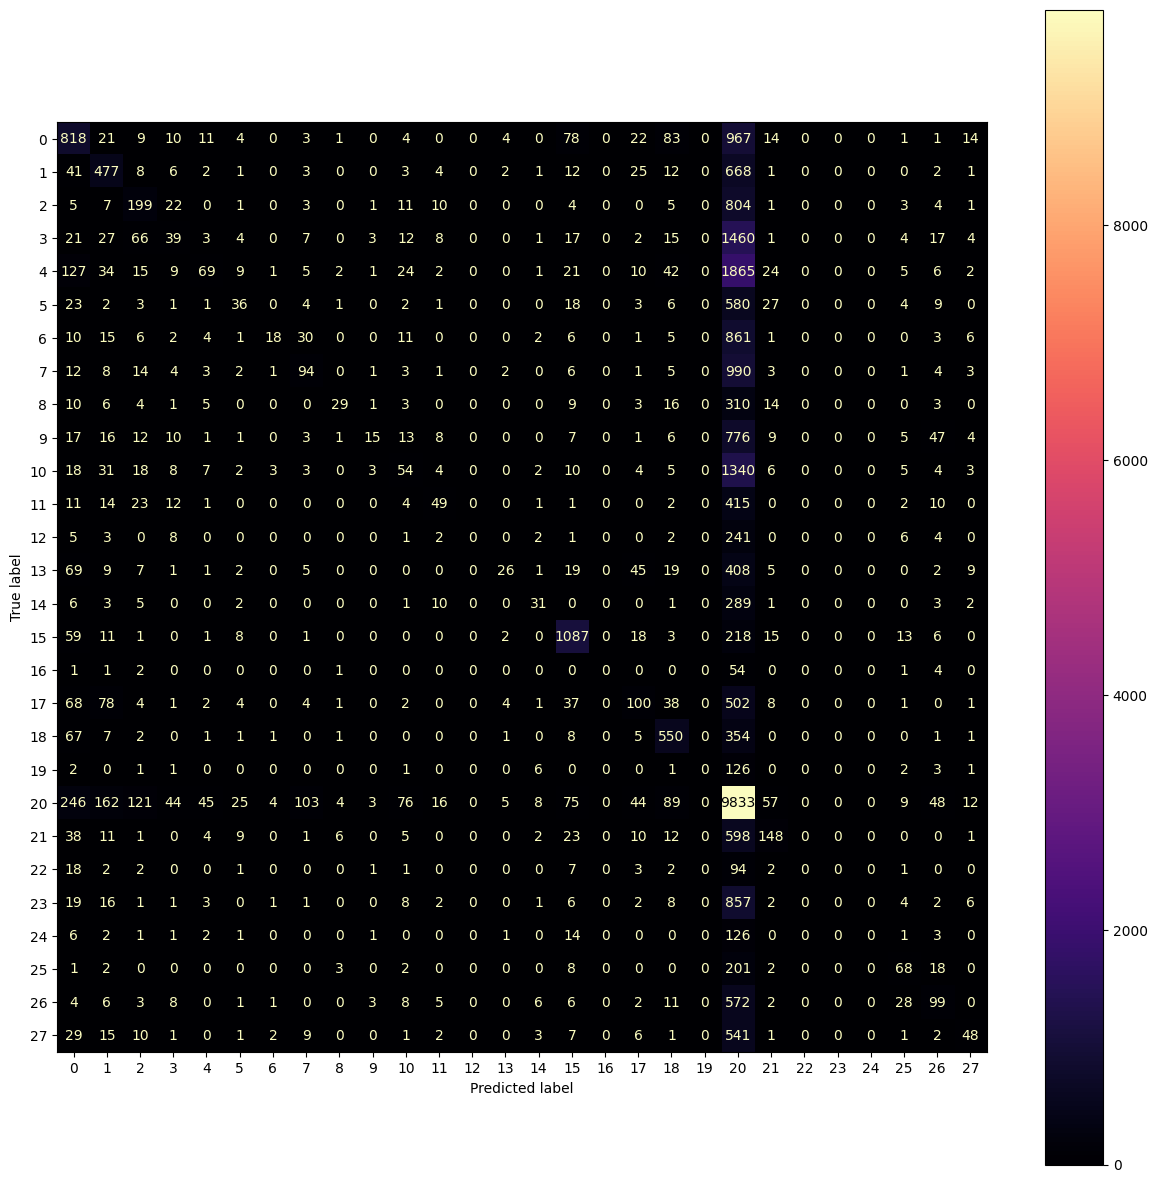

In [65]:
y_emo_predict = clf1.predict(X_embed_avg_test)
print(f"Score for Emotions: {clf1.score(X_embed_avg_test, y_embed_emotions_test)}")
metrics(y_embed_emotions_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_embed_emotions_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiments: 0.5334090313564503
Accuracy: 0.5334090313564503
Precision (Weighted): 0.5301266822733286
F1 Score (Weighted): 0.5168343519018684
F1 Score (Macro): 0.45686159870022053
              precision    recall  f1-score   support

           0       0.46      0.12      0.19      3760
           1       0.52      0.43      0.47      7726
           2       0.46      0.59      0.52     11029
           3       0.62      0.68      0.65     11832

    accuracy                           0.53     34347
   macro avg       0.52      0.45      0.46     34347
weighted avg       0.53      0.53      0.52     34347



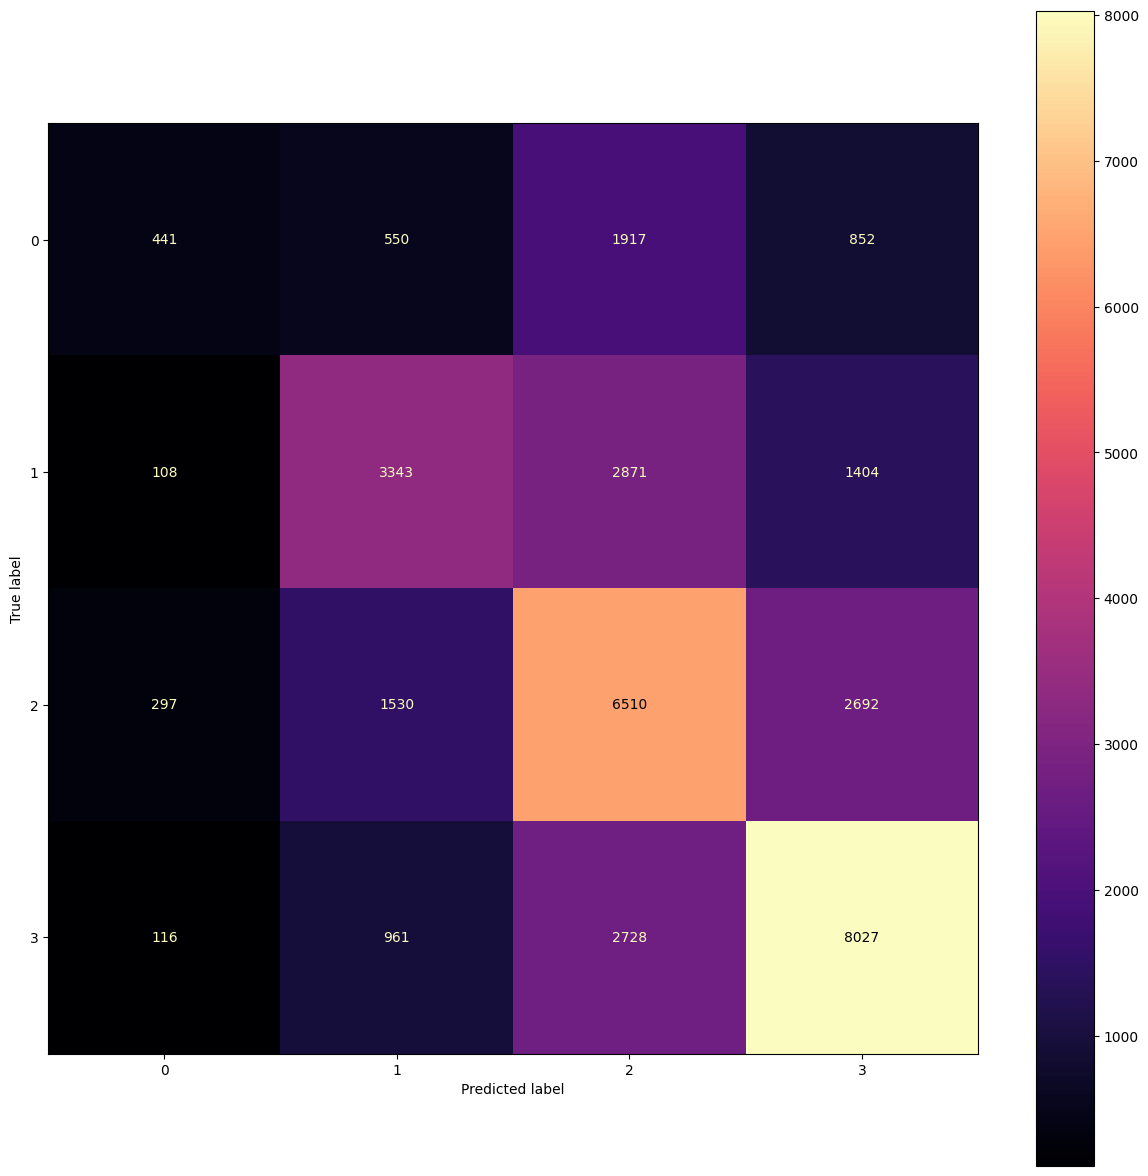

In [66]:
y_sent_predict = clf2.predict(X_embed_avg_test)
print(f"Score for Sentiments: {clf2.score(X_embed_avg_test, y_embed_sentiments_test)}")
metrics(y_embed_sentiments_test, y_sent_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_embed_sentiments_test, y_pred=y_sent_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

In [67]:
parameters = {"activation":("identity", "logistic", "tanh", "relu"),"hidden_layer_sizes":((5,5),(5,10)), "solver":("adam","sgd")}
#currently 5 neurons then 5 neurons and 5 neurons then 10 neurons in the hidden layer
clfMLP = MLPClassifier(early_stopping=True,verbose=True, max_iter=5)
classifier = GridSearchCV(estimator=clfMLP, param_grid=parameters, n_jobs=-1)
skip=False
if(not skip):
    if (os.path.exists('models/new_split/MLP1GridCV_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP1GridCV_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        X_embed_avg_train, y_embed_emotions_train
        classifier = classifier.fit(X_embed_avg_train, y_embed_emotions_train)
        with open('models/new_split/MLP1GridCV_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP1GridCV_model_emb.pickle','rb')
        clf1 = pickle.load(pickle_in)

    if (os.path.exists('models/new_split/MLP2GridCV_model_emb.pickle')):
        pickle_in = open('models/new_split/MLP2GridCV_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
        print("pickle file used")
    else:
        classifier = classifier.fit(X_embed_avg_train,y_embed_sentiments_train)
        with open('models/new_split/MLP2GridCV_model_emb.pickle','wb') as f:
            pickle.dump(classifier, f)

        pickle_in = open('models/new_split/MLP2GridCV_model_emb.pickle','rb')
        clf2 = pickle.load(pickle_in)
else:
    print("skipped")

KeyboardInterrupt: 

In [68]:
if (os.path.exists('models/twitter.pickle')):
    pickle_in = open('models/twitter.pickle','rb')
    twitter = pickle.load(pickle_in)
    print("pickle file used")
else:
    model =gensim.downloader.load("glove-twitter-100")
    with open('models/twitter.pickle','wb') as f:
        pickle.dump(model, f)

    pickle_in = open('models/twitter.pickle','rb')
    twitter = pickle.load(pickle_in)

pickle file used


In [70]:
model = gensim.downloader.load("glove-twitter-100")
X_embed_train,X_embed_test, y_embed_emotions_train, y_embed_emotions_test, y_embed_sentiments_train, y_embed_sentiments_test= train_test_split(post_tokens, encodedEmo, encodedSentiment, test_size = 0.2, train_size=0.8)
posts_tokens_in_model_training = [] # List of posts but with only the tokens that are in the model
number_tokens_after_removal_training = 0
# Removing words that are not in the Twitter model
for post in X_embed_train:
    post_with_unmodeled_words_removed_train = [] # Post with the unmodeled words removed
    for word in post:
        if word in model:
            post_with_unmodeled_words_removed_train.append(word)
        else:
            continue
    posts_tokens_in_model_training.append(post_with_unmodeled_words_removed_train)
    number_tokens_after_removal_training += len(post_with_unmodeled_words_removed_train)

# Calculating the average embed for each post in the training set
average_embeds_train = []
for post in posts_tokens_in_model_training:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) # Get the embedding for each word in the post, model[word] returns the embedding for the word
    # axis = 0 means that we are averaging the rows
    average_embeds_train.append(np.mean(token_embeddings,axis=0)) # use np.mean() to get the average of the embeddings for the words in the post


# ~~~~~~~~~~~Test set:
posts_tokens_in_model_test = [] # List of posts but with only the tokens that are in the model
number_tokens_after_removal_test = 0
# Removing words that are not in the Google model
for post in X_embed_test:
    post_with_unmodeled_words_removed_test = [] # Post with the unmodeled words removed
    for word in post:
        if word in model:
            post_with_unmodeled_words_removed_test.append(word)
        else:
            continue
    posts_tokens_in_model_test.append(post_with_unmodeled_words_removed_test)
    number_tokens_after_removal_test += len(post_with_unmodeled_words_removed_test)
    
# Calculating the average embed for each post in the test set
average_embeds_test = []
for post in posts_tokens_in_model_test:
    token_embeddings = []
    for word in post:
        token_embeddings.append(model[word]) # Get the embedding for each word in the post, model[word] returns the embedding for the word
    average_embeds_test.append(np.mean(token_embeddings,axis=0)) # use np.mean() to get the average of the embeddings for the words in the post

# Setting the training and test sets to the average embeddings
X_embed_avg_train = average_embeds_train
X_embed_avg_test = average_embeds_test
print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Shape of training set: (137456,)
Shape of test set: (34364,)


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [74]:
#Remove empty posts from training and test sets and the corresponding labels

print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
print(np.shape(y_embed_emotions_test))

# Remove all empty posts from the training set (if the shape isn't 100 it's bad!)
for i in range(len(X_embed_avg_train)):
    if i >= len(X_embed_avg_train):
        break
    if X_embed_avg_train[i].shape == (100,):
        continue
    else:
        X_embed_avg_train.pop(i)
        y_embed_emotions_train = np.delete(y_embed_emotions_train, i)
        y_embed_sentiments_train = np.delete(y_embed_sentiments_train, i)

# Remove all empty posts from the test set (if the shape isn't 300 it's bad!)
for i in range(len(X_embed_avg_test)):
    if i >= len(X_embed_avg_test):
        break
    if X_embed_avg_test[i].shape == (100,):
        continue
    else:
        X_embed_avg_test.pop(i)
        y_embed_emotions_test = np.delete(y_embed_emotions_test, i)
        y_embed_sentiments_test = np.delete(y_embed_sentiments_test, i)

#print shape of training and test sets
print(f"Shape of training set: {np.shape(X_embed_avg_train)}")
print(f"Shape of test set: {np.shape(X_embed_avg_test)}")
print(np.shape(y_embed_emotions_test))

# Turn all the posts into regular np arrays since otherwise we get: ValueError: Setting an array element with a sequence.
for i in range(len(X_embed_avg_train)):
    X_embed_avg_train[i] = np.array(X_embed_avg_train[i])

for i in range(len(X_embed_avg_test)):
    X_embed_avg_test[i] = np.array(X_embed_avg_test[i])

Shape of test set: (34206, 100)
(34206,)
Shape of training set: (136723, 100)
Shape of test set: (34206, 100)
(34206,)


In [75]:
classifier = MLPClassifier(max_iter=3)

if (os.path.exists('models/Embeddings_Twitter_MLP_model.pickle')):
    pickle_in = open('models/Embeddings_Twitter_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP = classifier.fit(X_embed_avg_train, y_embed_emotions_train)
    with open('models/Embeddings_Twitter_MLP_model.pickle','wb') as f:
            pickle.dump(EMLP, f)
    pickle_in = open('models/Embeddings_Twitter_MLP_model.pickle','rb')
    clf1 = pickle.load(pickle_in)

        
if (os.path.exists('models/Embeddings_Twitter_MLP_model2.pickle')):
    pickle_in = open('models/Embeddings_Twitter_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)
    print('pickle file used')
else:
    EMLP2 = classifier.fit(X_embed_avg_train, y_embed_sentiments_train)
    with open('models/Embeddings_Twitter_MLP_model2.pickle','wb') as f:
            pickle.dump(EMLP2, f)
    pickle_in = open('models/Embeddings_Twitter_MLP_model2.pickle','rb')
    clf2 = pickle.load(pickle_in)


C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Score for Emotions: 0.3659591884464714
Accuracy: 0.3659591884464714
Precision (Weighted): 0.34760219953741456
F1 Score (Weighted): 0.2584160174066141
F1 Score (Macro): 0.12254603482221989
              precision    recall  f1-score   support

           0       0.46      0.34      0.39      2093
           1       0.48      0.14      0.21      1253
           2       0.39      0.07      0.12      1004
           3       0.23      0.03      0.06      1661
           4       0.38      0.01      0.02      2260
           5       0.27      0.03      0.05       697
           6       0.23      0.01      0.01       976
           7       0.36      0.21      0.26      1160
           8       0.47      0.03      0.06       461
           9       0.25      0.00      0.01       913
          10       0.26      0.01      0.03      1620
          11       0.38      0.08      0.13       550
          12       0.00      0.00      0.00       282
          13       0.36      0.04      0.07       635
 

C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\girou\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

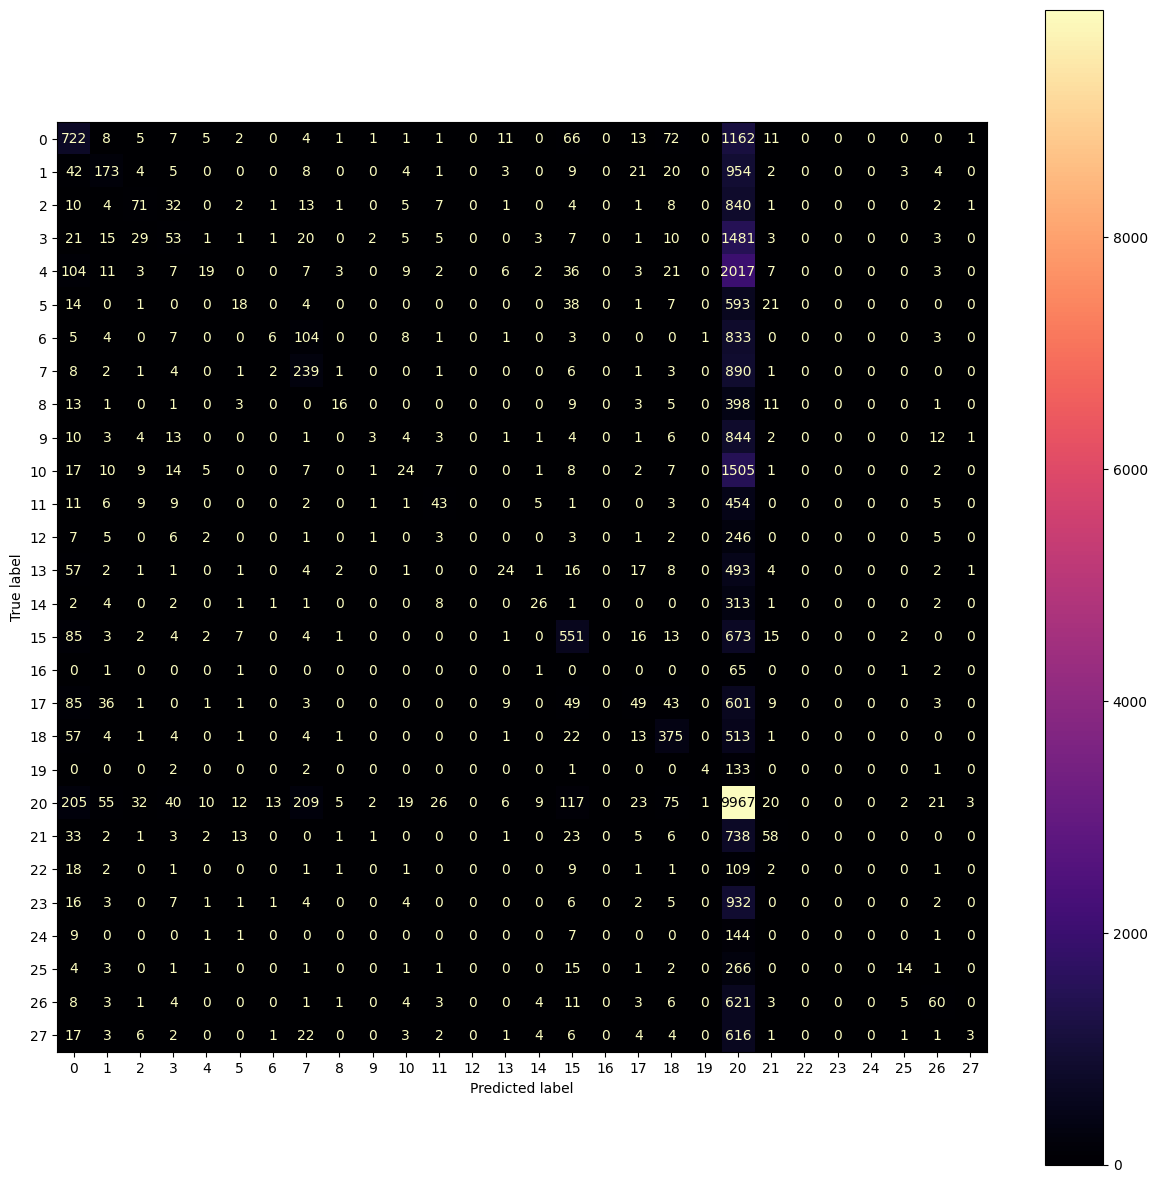

In [76]:
y_emo_predict = clf1.predict(X_embed_avg_test)
print(f"Score for Emotions: {clf1.score(X_embed_avg_test, y_embed_emotions_test)}")
metrics(y_embed_emotions_test, y_emo_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_embed_emotions_test, y_pred=y_emo_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

Score for Sentiments: 0.49172659767292287
Accuracy: 0.49172659767292287
Precision (Weighted): 0.5048860244545647
F1 Score (Weighted): 0.4828709722788132
F1 Score (Macro): 0.43777724922217875
              precision    recall  f1-score   support

           0       0.53      0.16      0.24      3817
           1       0.46      0.42      0.44      7655
           2       0.42      0.57      0.48     10872
           3       0.61      0.57      0.59     11862

    accuracy                           0.49     34206
   macro avg       0.50      0.43      0.44     34206
weighted avg       0.50      0.49      0.48     34206



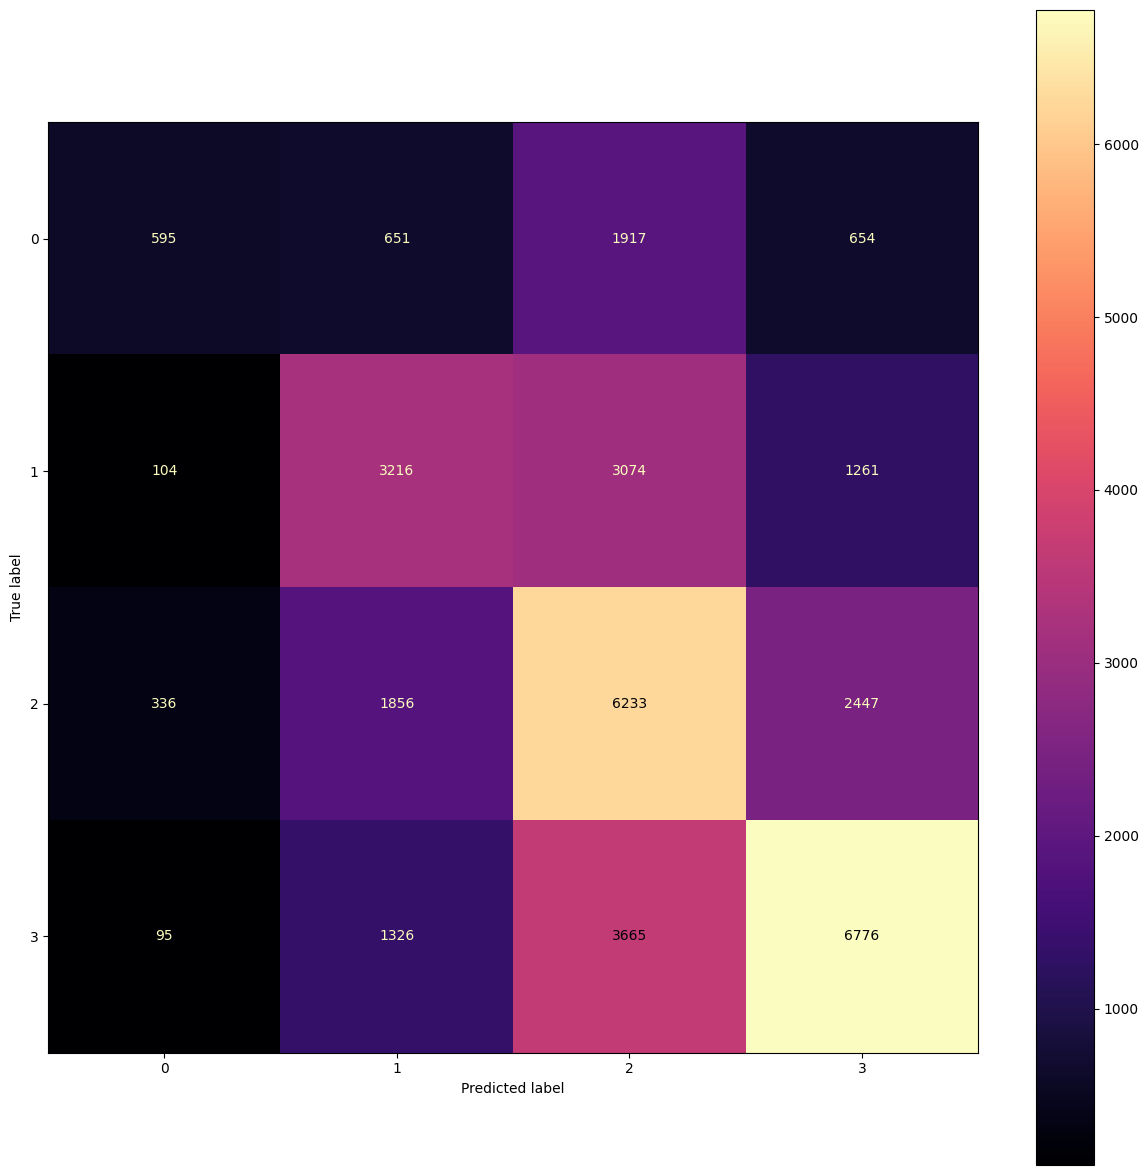

In [77]:
y_sent_predict = clf2.predict(X_embed_avg_test)
print(f"Score for Sentiments: {clf2.score(X_embed_avg_test, y_embed_sentiments_test)}")
metrics(y_embed_sentiments_test, y_sent_predict)
cmp = ConfusionMatrixDisplay(confusion_matrix(y_true=y_embed_sentiments_test, y_pred=y_sent_predict))
fig, ax = plt.subplots(figsize=(15,15))
cmp.plot(ax=ax, cmap='magma')

In [ ]:
if (os.path.exists('models/wiki.pickle')):
    pickle_in = open('models/wiki.pickle','rb')
    wiki = pickle.load(pickle_in)
    print("pickle file used")
else:
    model =gensim.downloader.load("glove-wiki-gigaword-300")
    with open('models/wiki.pickle','wb') as f:
        pickle.dump(model, f)

    pickle_in = open('models/wiki.pickle','rb')
    wiki = pickle.load(pickle_in)